## Flourishing - Machine Learning Introduction
## Joaquin Arias


In [53]:
# Importing the basic libraries that will help us through the process
import unittest
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb
import os
import warnings

warnings.filterwarnings("ignore")


In [54]:
os.getcwd()

'C:\\Users\\JUAQUIN\\Desktop\\Flourishing Project\\Data'

In [55]:
path_dir = "../Data"

In [56]:
os.chdir(path_dir)

In [57]:
os.getcwd()

'C:\\Users\\JUAQUIN\\Desktop\\Flourishing Project\\Data'

## UNIVARIATE ANALYSIS

In [59]:
# Importing and reading the first rows of the file to understand the context and the information provided
df = pd.read_excel("Flourishing_248_HD - Copy.xlsx")
df.head()

,ID,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
0,344,72,6,2,2,3,82,3,83,4.142857,44
1,317,45,6,2,2,3,81,3,83,4.000000,44
2,444,43,5,1,1,3,79,3,78,5.000000,47
3,270,60,2,2,3,3,79,3,82,4.666667,42
4,52,49,2,2,2,3,77,3,73,2.285714,33


In [60]:
# As the identifier will not be useful, we transform it to the index
df.set_index("ID", inplace=True)
df.head()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
ID,,,,,,,,,,
344,72,6,2,2,3,82,3,83,4.142857,44
317,45,6,2,2,3,81,3,83,4.000000,44
444,43,5,1,1,3,79,3,78,5.000000,47
270,60,2,2,3,3,79,3,82,4.666667,42
52,49,2,2,2,3,77,3,73,2.285714,33


In [61]:
# We create the dictionaries that will transform the numbers in their respective equivalence
sex_map = {"1": "Male", "2": "Female"}
family_map = {"1": "Single", "2": "Separate/Divorced", "3": "Couple"}
education_map = {
    "1": "Has not completed high school degree",
    "2": "Has completed only a high school degree",
    "3": "Has completed up to 2 years after high school degree",
    "4": "Has completed up to 3 years after high school degree",
    "5": "Has completed up to 4 years after high school degree",
    "6": "Has completed 5 years after high school degree or more",
}
flourishing_map = {
    "1": "Languishing",
    "2": "Moderately Mentally Healthy",
    "3": "Flourishing",
}

In [62]:
# We replace the numbers with the values that correspond and count how many of each one we have to validate the correct transformation
df["sex"] = df["sex"].astype(str).map(sex_map)
df["sex"].value_counts()

sex
Female    151
Male       97
Name: count, dtype: int64

In [63]:
df["famstatus"] = df["famstatus"].astype(str).map(family_map)
df["famstatus"].value_counts()

famstatus
Couple               173
Single                40
Separate/Divorced     35
Name: count, dtype: int64

In [64]:
df["education"] = df["education"].astype(str).map(education_map)
df["education"].value_counts()

education
Has completed 5 years after high school degree or more    110
Has completed up to 4 years after high school degree       39
Has completed up to 2 years after high school degree       39
Has completed up to 3 years after high school degree       31
Has completed only a high school degree                    20
Has not completed high school degree                        9
Name: count, dtype: int64

In [65]:
df["pro_cat"] = df["pro_cat"].astype(str).map(flourishing_map)
df["pro_cat"].value_counts()

pro_cat
Moderately Mentally Healthy    159
Flourishing                     51
Languishing                     38
Name: count, dtype: int64

In [66]:
df["priv_cat"] = df["priv_cat"].astype(str).map(flourishing_map)
df["priv_cat"].value_counts()

priv_cat
Moderately Mentally Healthy    164
Flourishing                     70
Languishing                     14
Name: count, dtype: int64

In [67]:
df.head(3)

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow
ID,,,,,,,,,,
344,72,Has completed 5 years after high school degree...,Female,Separate/Divorced,Flourishing,82,Flourishing,83,4.142857,44
317,45,Has completed 5 years after high school degree...,Female,Separate/Divorced,Flourishing,81,Flourishing,83,4.000000,44
444,43,Has completed up to 4 years after high school ...,Male,Single,Flourishing,79,Flourishing,78,5.000000,47


In [68]:
# We define a function that maps positivity values into the corresponding categories
def positivity_to_category (value):
  if value < 1 :
    return "depressed"
  elif value < 2:
    return "languishing"
  elif value < 3:
    return "moderately emootionally healthy"
  else:
    return "emotionally flourishing"

In [69]:
# We add a column that will categorize the positivity
df["pos_cat"] = df["positivity"].apply(positivity_to_category)

In [70]:
# We get the head and the types of the data frame so that we can validate that the transformation project was correct
df.head()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,pos_cat
ID,,,,,,,,,,,
344,72,Has completed 5 years after high school degree...,Female,Separate/Divorced,Flourishing,82,Flourishing,83,4.142857,44,emotionally flourishing
317,45,Has completed 5 years after high school degree...,Female,Separate/Divorced,Flourishing,81,Flourishing,83,4.000000,44,emotionally flourishing
444,43,Has completed up to 4 years after high school ...,Male,Single,Flourishing,79,Flourishing,78,5.000000,47,emotionally flourishing
270,60,Has completed only a high school degree,Female,Couple,Flourishing,79,Flourishing,82,4.666667,42,emotionally flourishing
52,49,Has completed only a high school degree,Female,Separate/Divorced,Flourishing,77,Flourishing,73,2.285714,33,moderately emootionally healthy


In [71]:
df.dtypes

age             int64
education      object
sex            object
famstatus      object
pro_cat        object
pro_quant       int64
priv_cat       object
priv_quant      int64
positivity    float64
flow            int64
pos_cat        object
dtype: object

In [72]:
# We define the categorical and quantitative variables
categories_col = ["sex", "famstatus", "education", "pro_cat", "priv_cat", "positivity"]
quantitatives_col = ["age", "pro_quant", "priv_quant", "flow"]
categories_data = df[categories_col]
quantitatives_data = df[quantitatives_col]

In [73]:
#Create a function that can make the summary tables for categorical variables and describe the quantitative variable
def summary_table(table):
    for col in categories_data.columns:
        print(f"Summary Table for {col}:")
        dict_data = categories_data[col].value_counts()
        sum_table = dict_data.to_dict()
        for key in sum_table:
            sum_table[key] = sum_table[key] / len(categories_data) * 100
        print(sum_table, "\n")
    for col in quantitatives_data.columns:
        print(f"Descriptive Table for {col}:", "\n")
        print(quantitatives_data[col].describe(), "\n")


summary_table(df)

Summary Table for sex:
{'Female': 60.88709677419355, 'Male': 39.11290322580645} 

Summary Table for famstatus:
{'Couple': 69.75806451612904, 'Single': 16.129032258064516, 'Separate/Divorced': 14.112903225806454} 

Summary Table for education:
{'Has completed 5 years after high school degree or more': 44.354838709677416, 'Has completed up to 4 years after high school degree': 15.725806451612904, 'Has completed up to 2 years after high school degree': 15.725806451612904, 'Has completed up to 3 years after high school degree': 12.5, 'Has completed only a high school degree': 8.064516129032258, 'Has not completed high school degree': 3.6290322580645165} 

Summary Table for pro_cat:
{'Moderately Mentally Healthy': 64.11290322580645, 'Flourishing': 20.56451612903226, 'Languishing': 15.32258064516129} 

Summary Table for priv_cat:
{'Moderately Mentally Healthy': 66.12903225806451, 'Flourishing': 28.225806451612907, 'Languishing': 5.64516129032258} 

Summary Table for positivity:
{2.0: 2.82258

In [74]:
#Create a graph function
def graphics(table):
    for col in categories_data.columns:
        dict_data = categories_data[col].value_counts()
        sum_table = dict_data.to_dict()
        for key in sum_table:
            sum_table[key] = sum_table[key] / len(categories_data) * 100

        plt.pie(sum_table.values(), labels=sum_table.keys())
        plt.title(f"Pie Chart of {col}")
        plt.show()
        print("\n")
        plt.bar(sum_table.keys(), sum_table.values())
        plt.xlabel(f"{col}")
        plt.ylabel("Frequency (%)")
        plt.title(f"Bar Chart of {col}")
        plt.xticks(rotation=90)
        plt.show()
        print("\n")
    for col in quantitatives_data.columns:
        plt.hist(quantitatives_data[col], bins=10)
        plt.xlabel(f"{col}")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {col}")
        plt.show()
        print("\n")
        plt.boxplot(quantitatives_data[col])
        plt.title(f"Boxplot of {col}")
        plt.xlabel(f"{col}")
        plt.ylabel("Values")
        plt.show()
        print("\n")

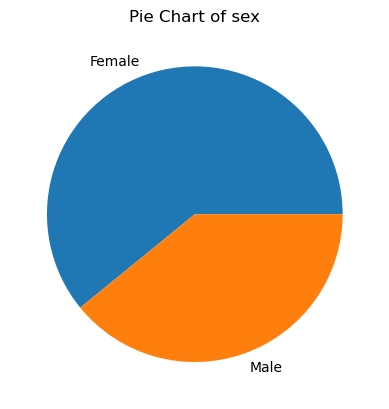

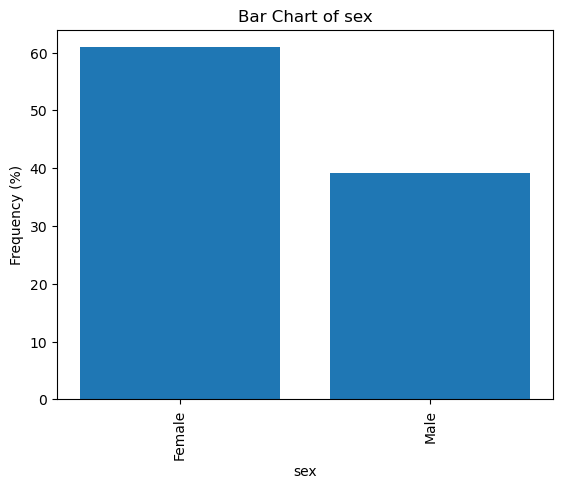

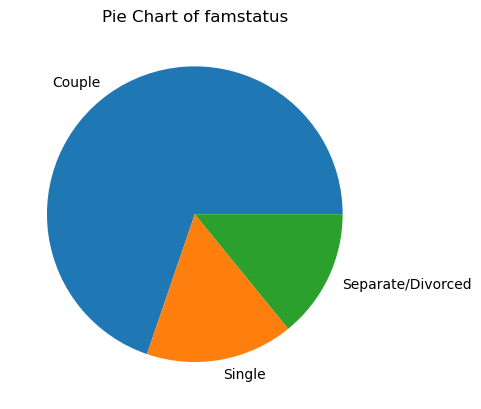

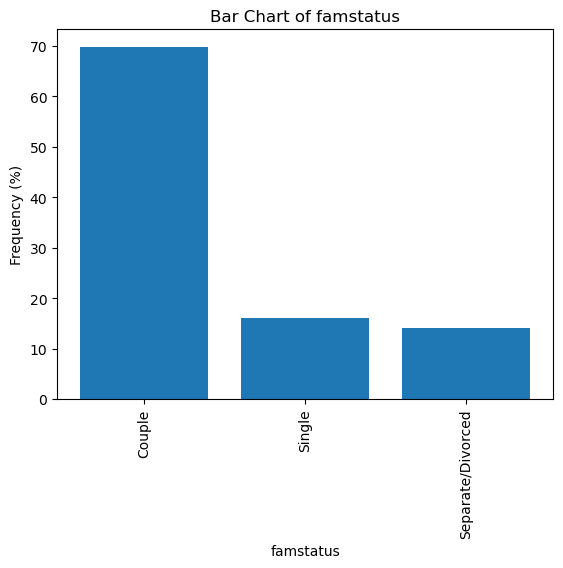

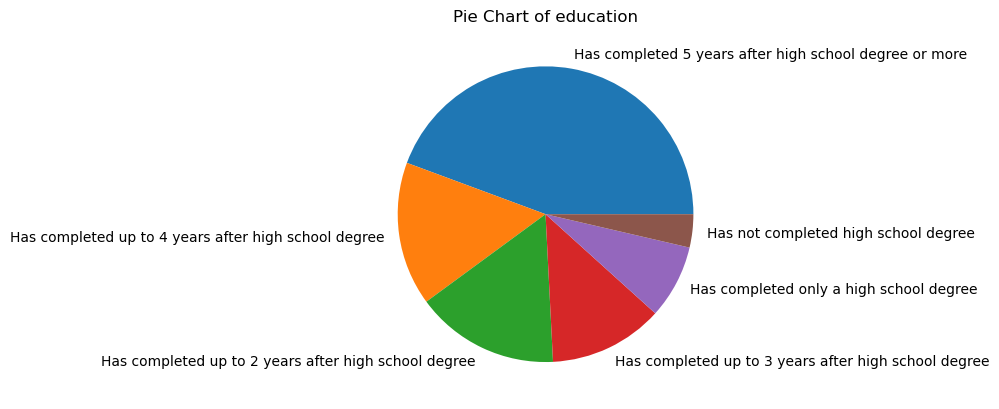

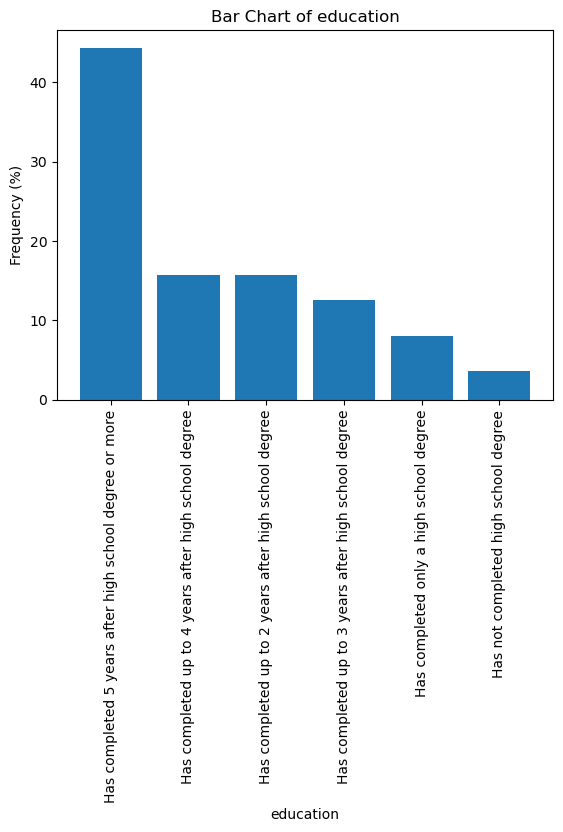

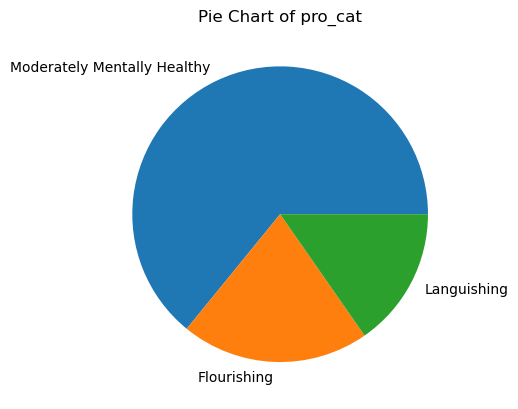

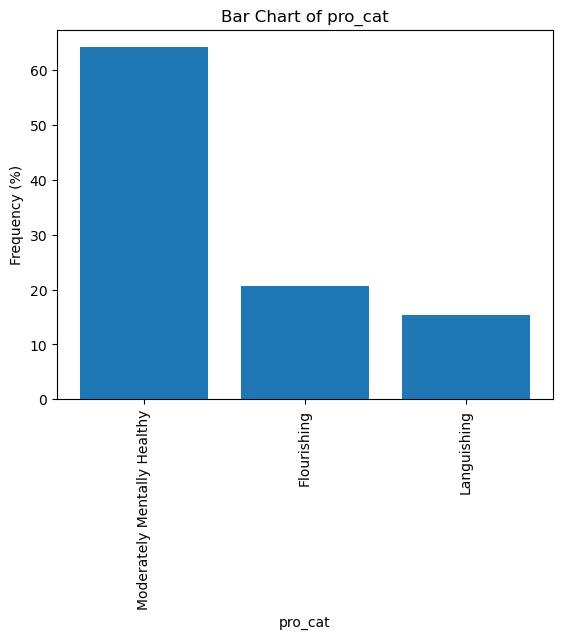

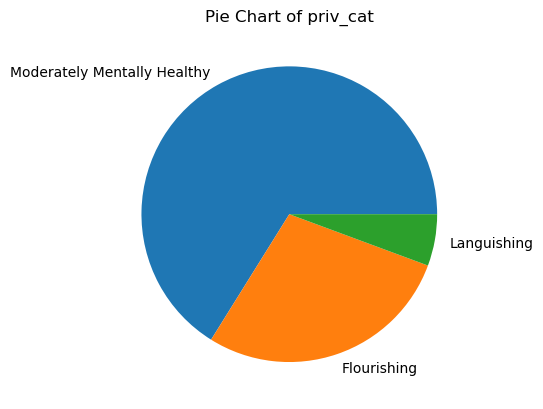

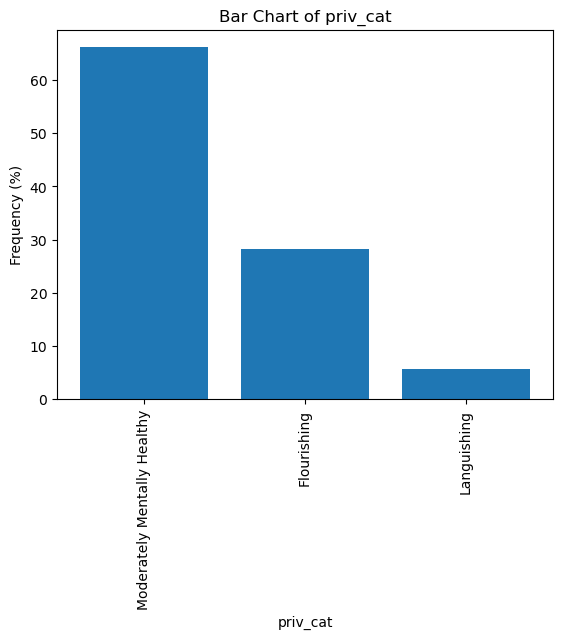

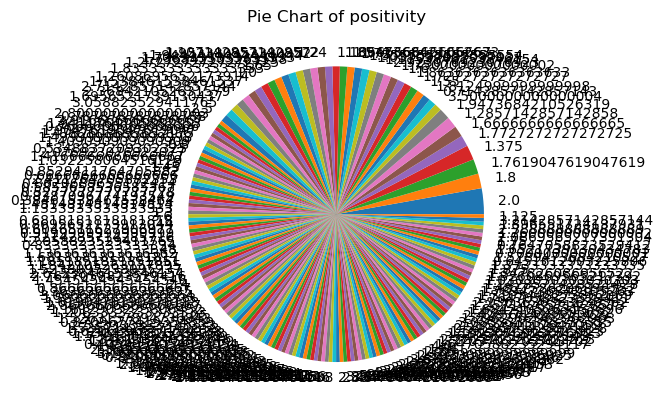

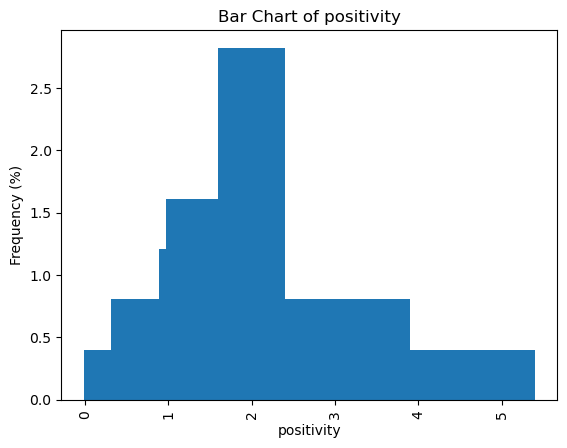

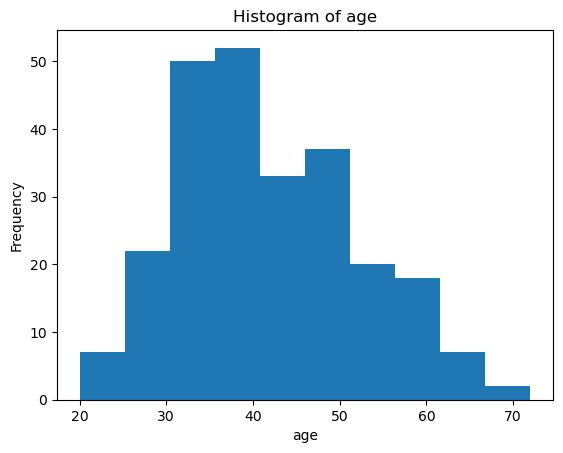

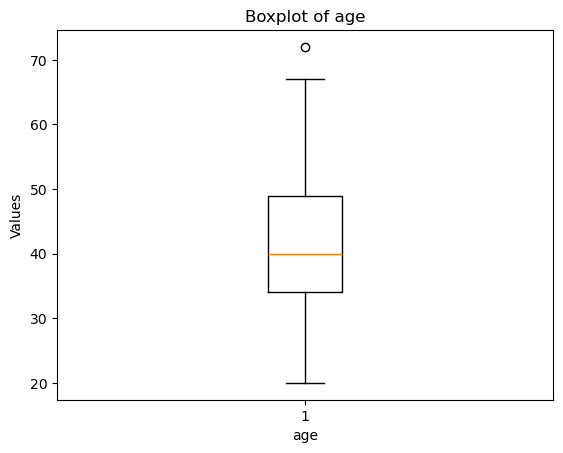

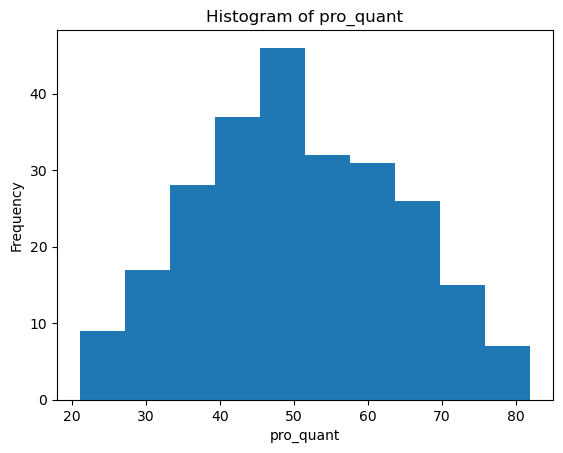

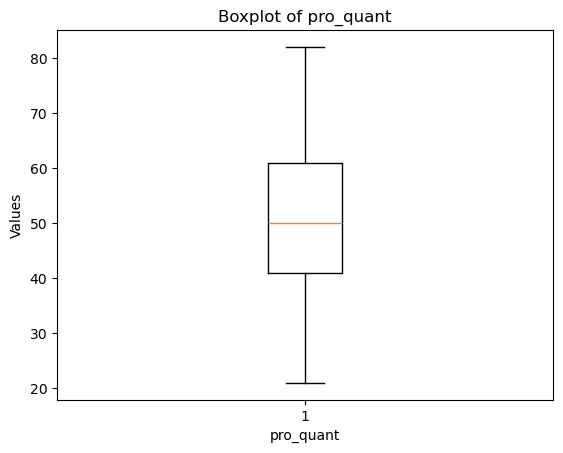

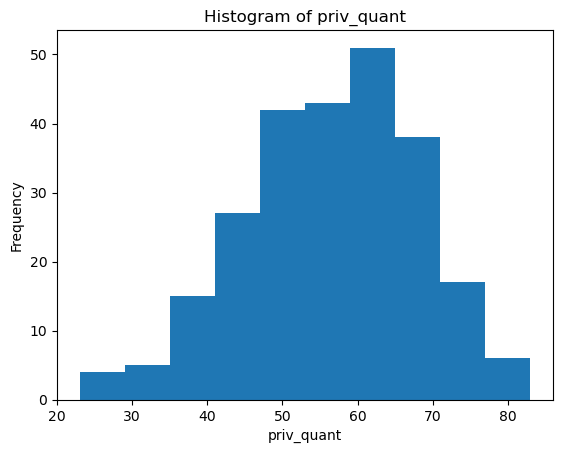

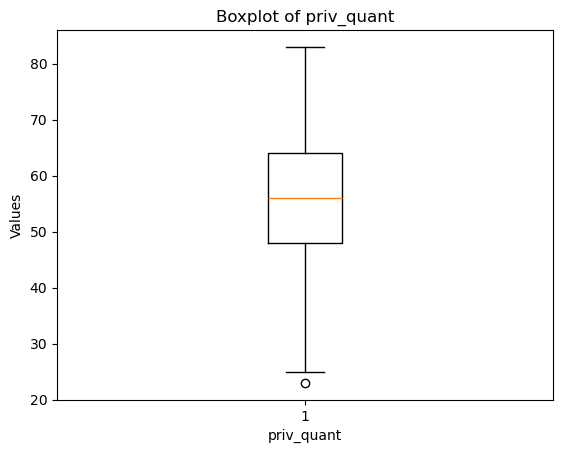

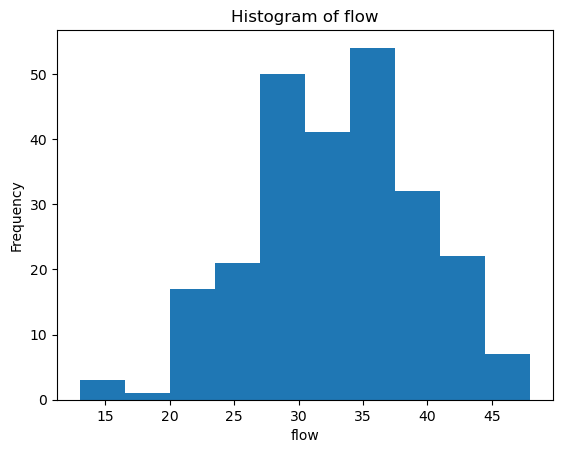

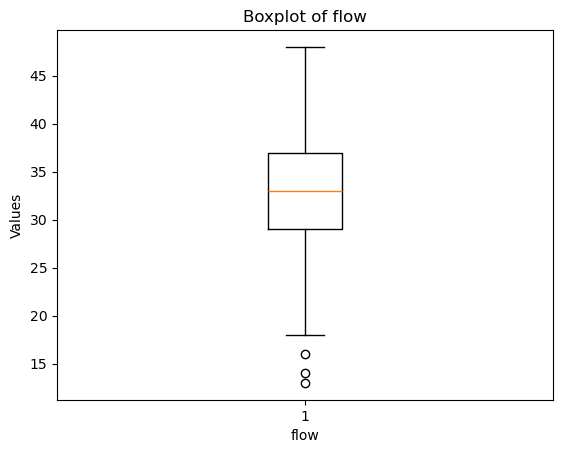

In [75]:
graphics(df)

## BIVARIATE ANALYSIS

 ## Categorical Vs. Categorical

In [78]:
# The following function can create contingency tables for categorical variables
def contingency_table(table):
    for i in range(len(categories_col)):
        for j in range(i + 1, len(categories_col)):
            col1 = categories_col[i]
            col2 = categories_col[j]
            contingency_table = pd.crosstab(df[col1], df[col2])
            print(f"Contingency Table for {col1} Vs. {col2}:\n", contingency_table)

In [79]:
contingency_table(df)

Contingency Table for sex Vs. famstatus:
 famstatus  Couple  Separate/Divorced  Single
sex                                         
Female         99                 29      23
Male           74                  6      17
Contingency Table for sex Vs. education:
 education  Has completed 5 years after high school degree or more  \
sex                                                                 
Female                                                    67        
Male                                                      43        

education  Has completed only a high school degree  \
sex                                                  
Female                                          12   
Male                                             8   

education  Has completed up to 2 years after high school degree  \
sex                                                               
Female                                                    23      
Male                                     

In [80]:
# Following the contingency tables I check if theres a significant relationship between variables using chi square
from scipy.stats import chi2_contingency
categorical = ["education","sex","famstatus","pro_cat","pos_cat"]
# Create a function that can calculate the chi-square statistic. the p-value and their strenght with Cramer´s V for each pair of categories
def calculate_chisquare (df,categorical_variables):
  contingency_tables = {}
  chisquare_results = {}
  for i, var1 in enumerate(categorical_variables):
    for j, var2 in enumerate(categorical_variables):
      if i < j:
        contingency_table = pd.crosstab(df[var1], df[var2])
        contingency_tables[(var1, var2)] = contingency_table
        chi2,p,_,_ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()  # Total number of observations
        k = min(contingency_table.shape)  # Minimum of rows or columns
        cramers_v = np.sqrt(chi2 / (n * (k - 1)))
        chisquare_results[(var1, var2)] = {"Chi-Square":chi2,"P-Value":p,"Cramers V": cramers_v}
        print (f"Chi-Square Statistic for {var1} Vs. {var2}: {chi2}")
        print (f"P-Value for {var1} Vs. {var2}: {p}")
        print(f"Cramer's V for {var1} Vs. {var2}: {cramers_v}\n")
  return chisquare_results

In [81]:
calculate_chisquare(df,categorical)

Chi-Square Statistic for education Vs. sex: 1.8249843705978068
P-Value for education Vs. sex: 0.872792808219094
Cramer's V for education Vs. sex: 0.08578349460099477

Chi-Square Statistic for education Vs. famstatus: 10.217108543351317
P-Value for education Vs. famstatus: 0.42165665979460965
Cramer's V for education Vs. famstatus: 0.14352354914780532

Chi-Square Statistic for education Vs. pro_cat: 11.946738012092295
P-Value for education Vs. pro_cat: 0.28863694985086
Cramer's V for education Vs. pro_cat: 0.1551971821489046

Chi-Square Statistic for education Vs. pos_cat: 26.869523322545042
P-Value for education Vs. pos_cat: 0.029817582810017444
Cramer's V for education Vs. pos_cat: 0.19003933988084015

Chi-Square Statistic for sex Vs. famstatus: 8.26058510895296
P-Value for sex Vs. famstatus: 0.01607817439257878
Cramer's V for sex Vs. famstatus: 0.18250701609307357

Chi-Square Statistic for sex Vs. pro_cat: 0.4664780874312233
P-Value for sex Vs. pro_cat: 0.7919642368215398
Cramer's V 

{('education', 'sex'): {'Chi-Square': 1.8249843705978068,
  'P-Value': 0.872792808219094,
  'Cramers V': 0.08578349460099477},
 ('education', 'famstatus'): {'Chi-Square': 10.217108543351317,
  'P-Value': 0.42165665979460965,
  'Cramers V': 0.14352354914780532},
 ('education', 'pro_cat'): {'Chi-Square': 11.946738012092295,
  'P-Value': 0.28863694985086,
  'Cramers V': 0.1551971821489046},
 ('education', 'pos_cat'): {'Chi-Square': 26.869523322545042,
  'P-Value': 0.029817582810017444,
  'Cramers V': 0.19003933988084015},
 ('sex', 'famstatus'): {'Chi-Square': 8.26058510895296,
  'P-Value': 0.01607817439257878,
  'Cramers V': 0.18250701609307357},
 ('sex', 'pro_cat'): {'Chi-Square': 0.4664780874312233,
  'P-Value': 0.7919642368215398,
  'Cramers V': 0.04337003608442827},
 ('sex', 'pos_cat'): {'Chi-Square': 4.90325105824885,
  'P-Value': 0.17902021519630862,
  'Cramers V': 0.14061000541203023},
 ('famstatus', 'pro_cat'): {'Chi-Square': 2.99164546865293,
  'P-Value': 0.5592244833296824,
  'C

In [82]:
# Created a function to graph side by side bar charts for the categorical variables
def side_by_side (df,categorical_variables):
  for i, var1 in enumerate(categorical_variables):
    for j, var2 in enumerate(categorical_variables):
      if i < j:
        contingency_table = pd.crosstab(df[var1], df[var2])
        contingency_table.plot(kind="bar", stacked=False)
        plt.title(f"Side by Side Bar Chart {var1} Vs. {var2}")
        plt.xlabel(var1)
        plt.ylabel("Frequency")
        plt.xticks(rotation=90)
        plt.show()
        print("\n")

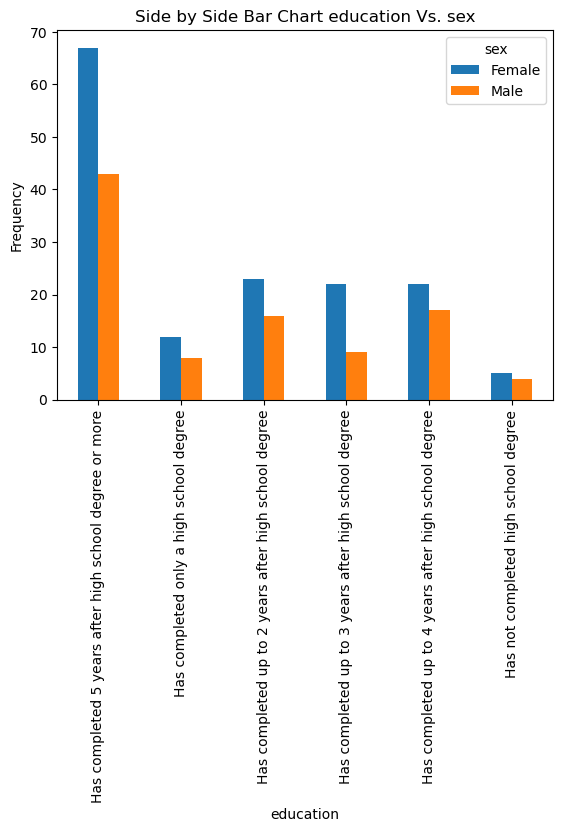

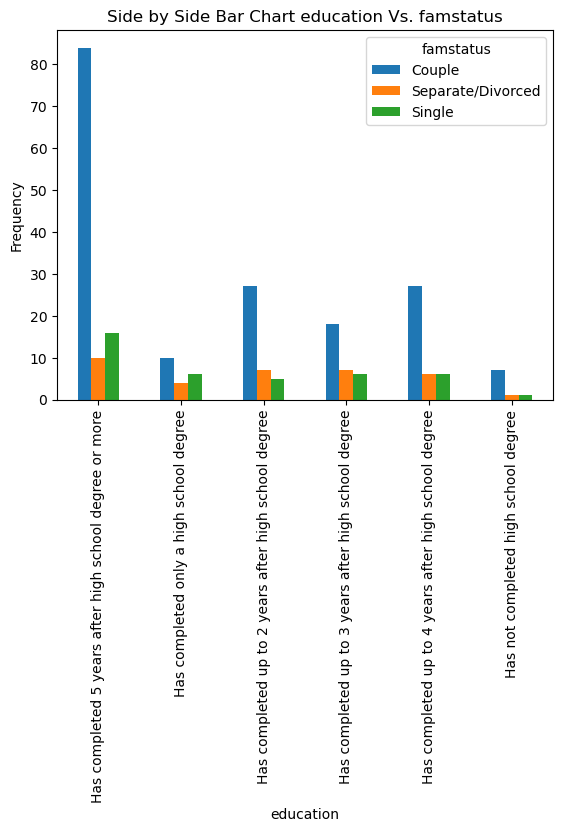

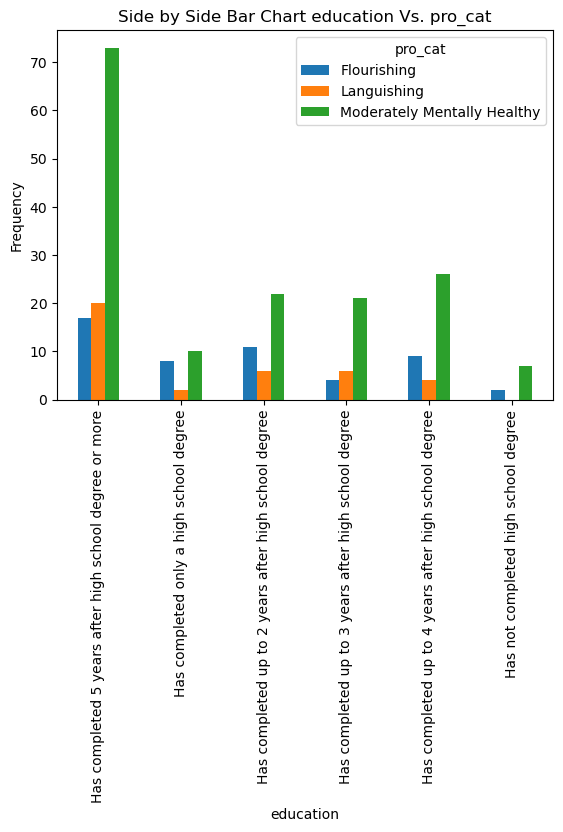

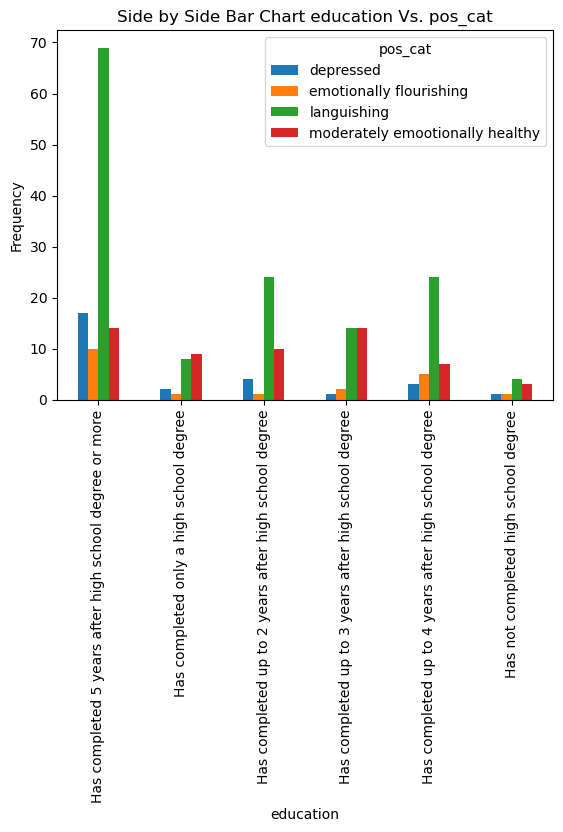

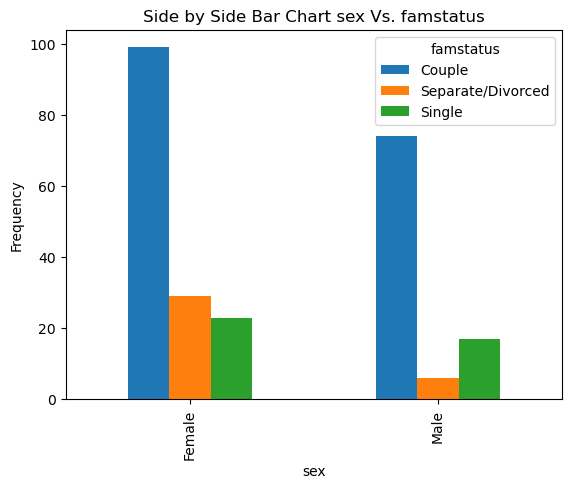

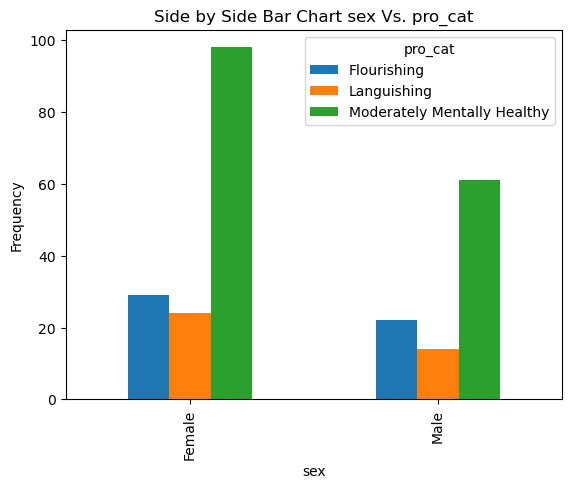

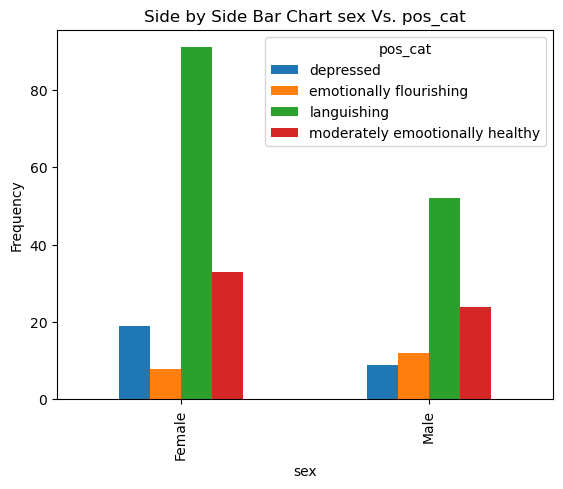

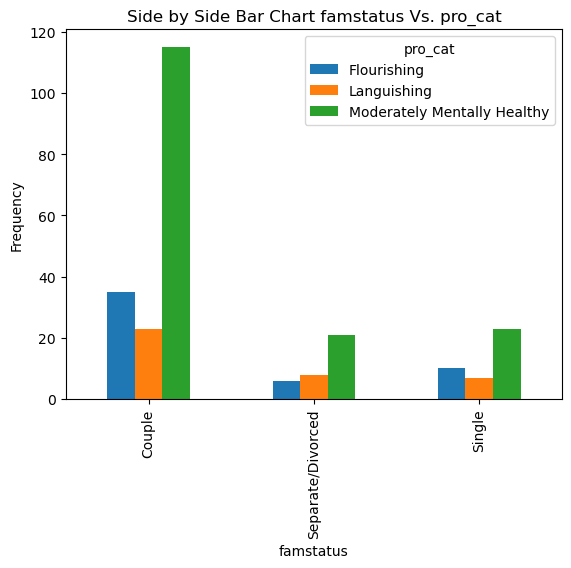

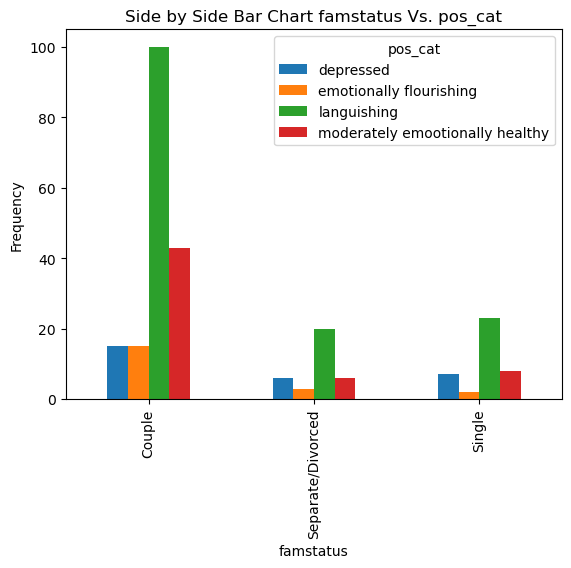

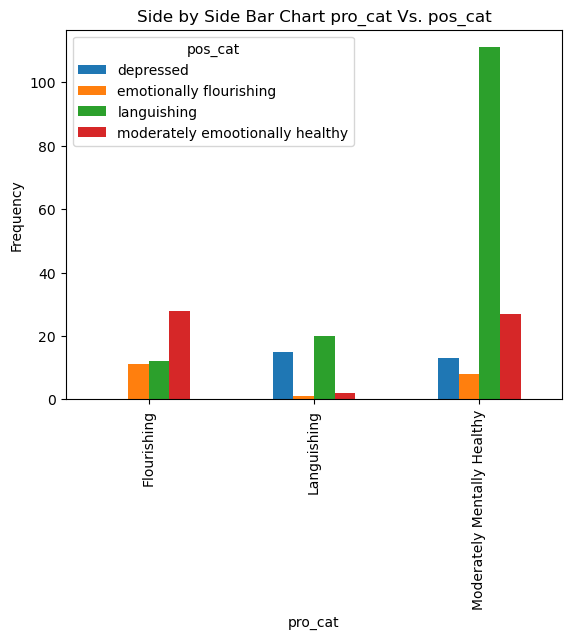

In [83]:
side_by_side(df,categorical)

In [84]:
def stacker_bar (df,categorical_variables):
  for i, var1 in enumerate(categorical_variables):
    for j, var2 in enumerate(categorical_variables):
      if i != j:
        stacked_data = df.groupby([var1, var2]).size().unstack(fill_value=0)
        stacked_data.plot(kind="bar", stacked=True)
        plt.title(f"Stacked Bar Chart {var1} Vs. {var2}")
        plt.xlabel(var1)
        plt.ylabel("Frequency")
        plt.xticks(rotation=90)
        plt.show()
        print("\n")

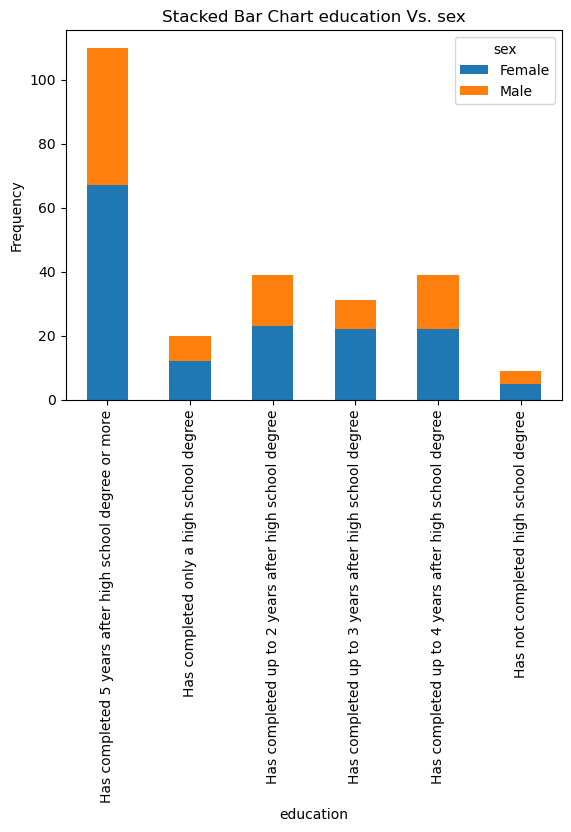

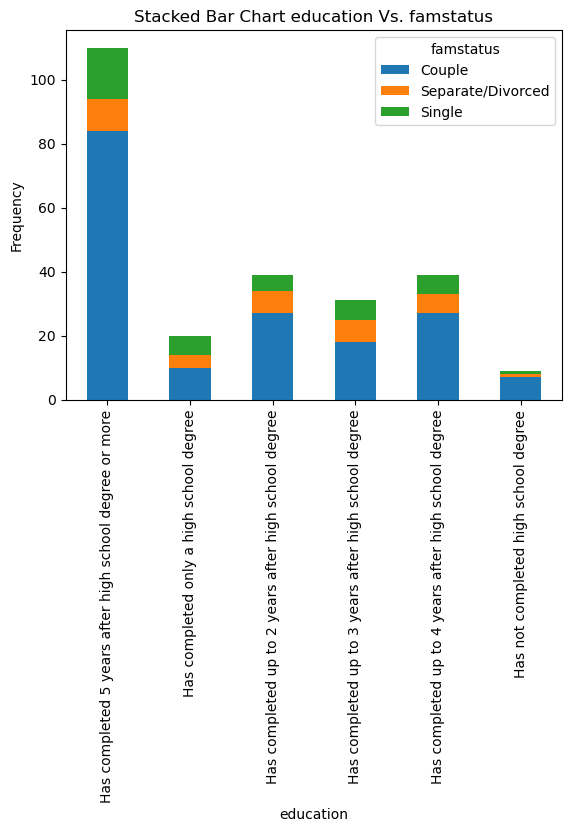

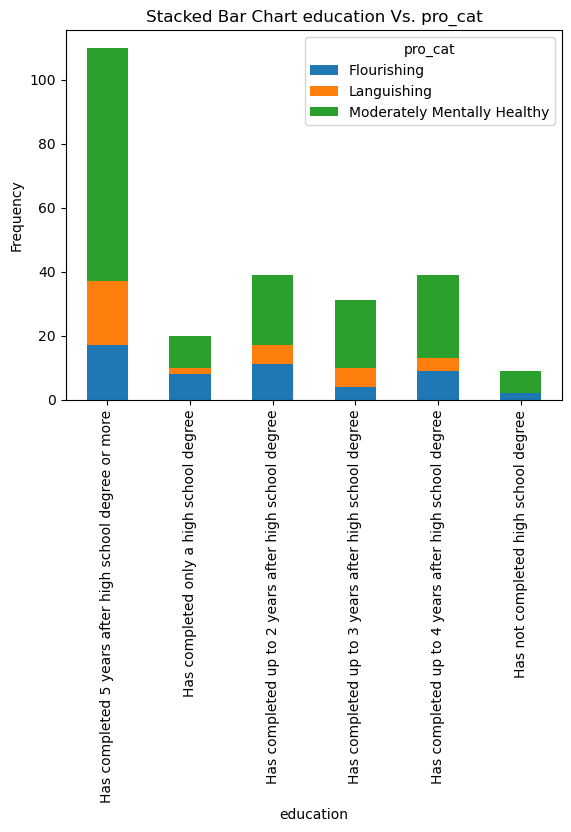

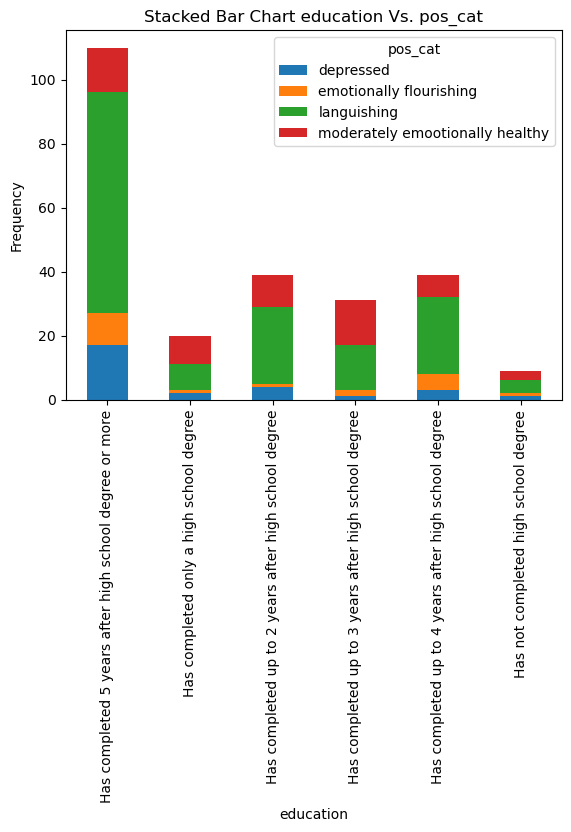

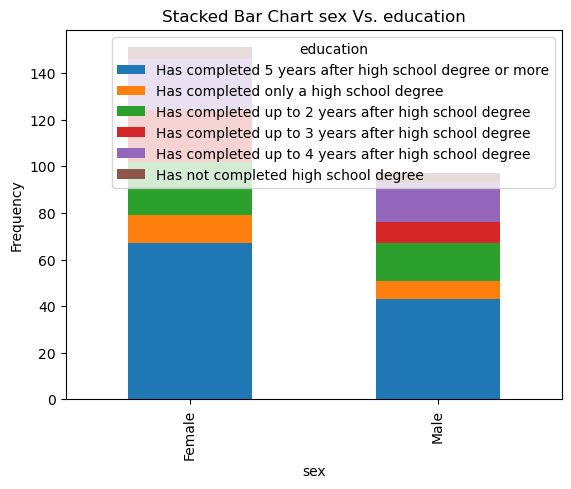

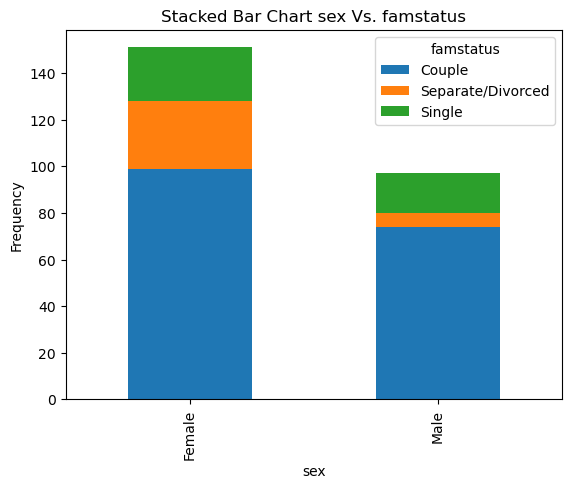

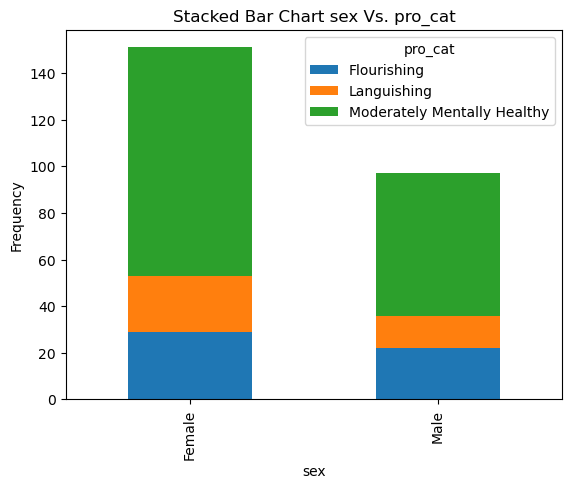

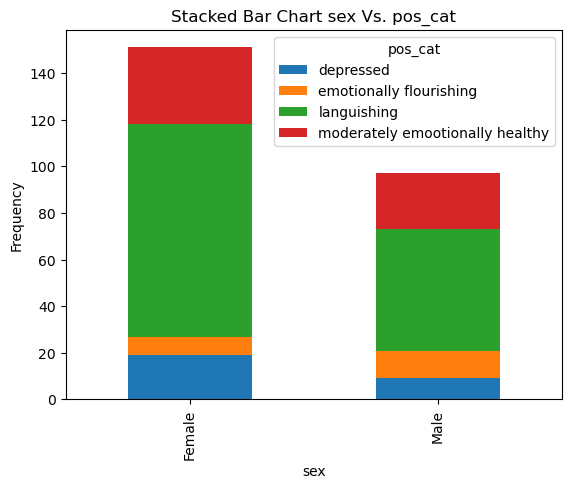

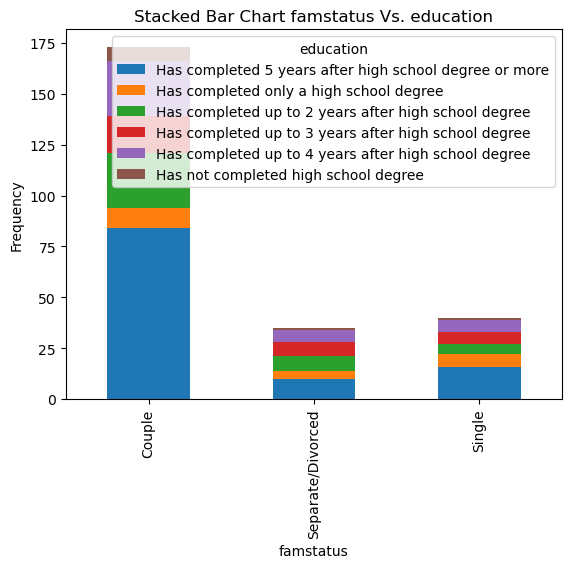

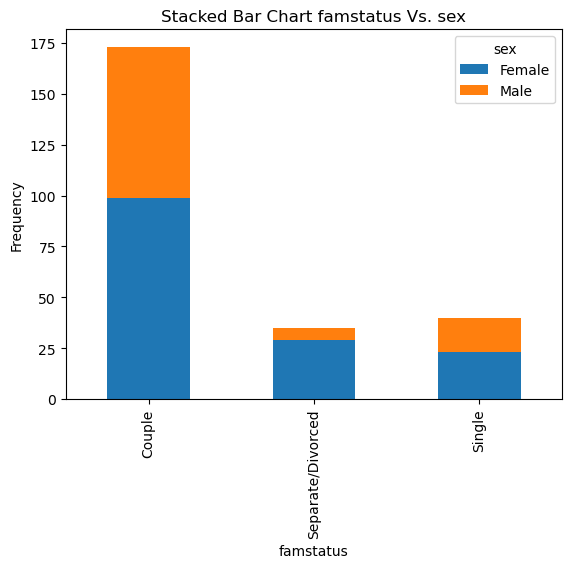

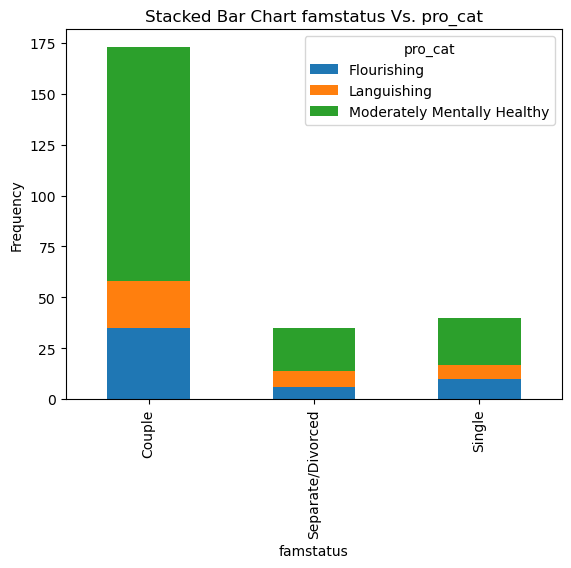

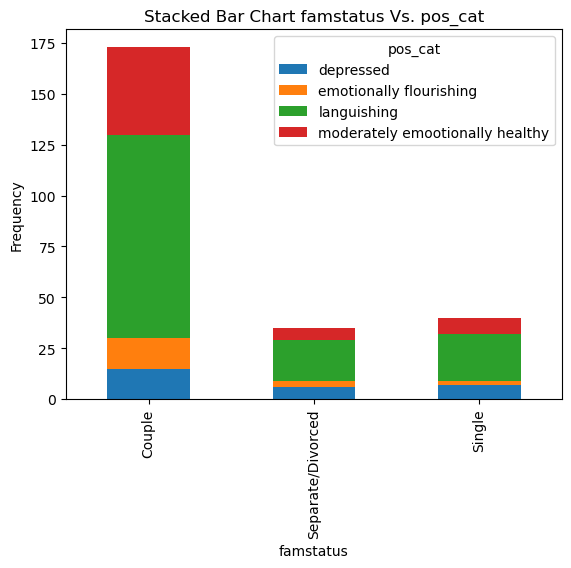

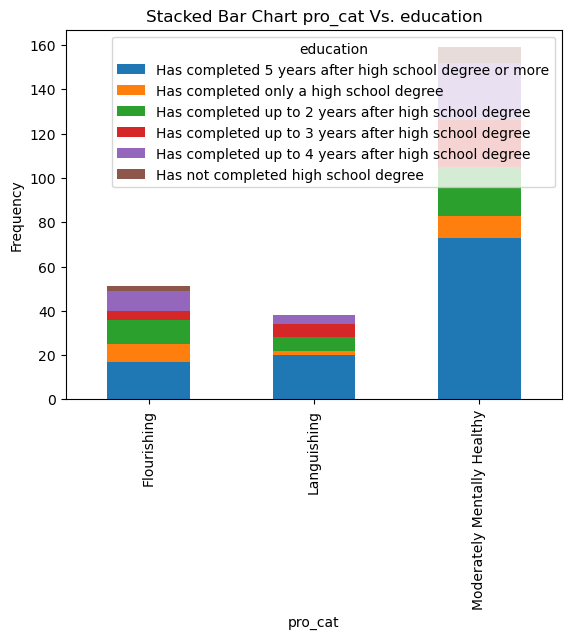

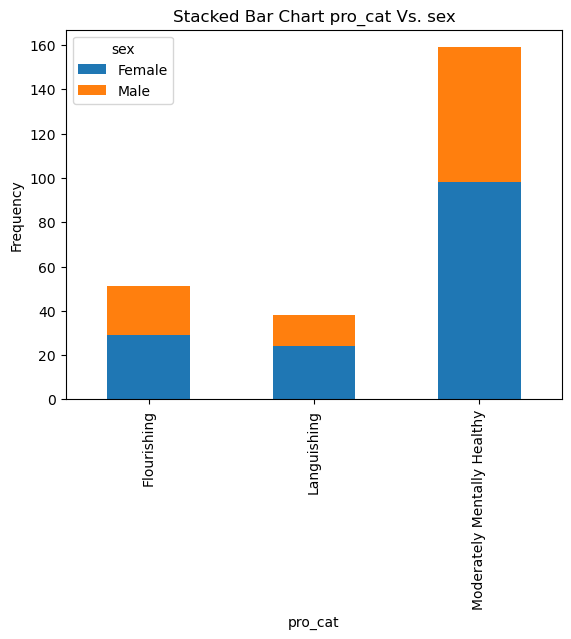

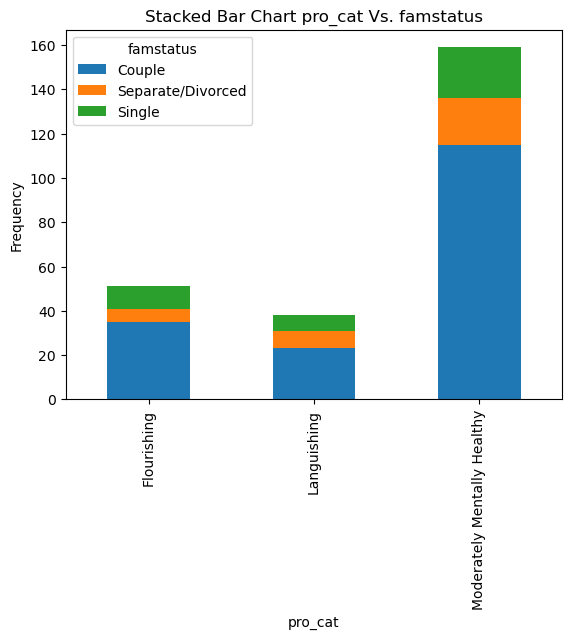

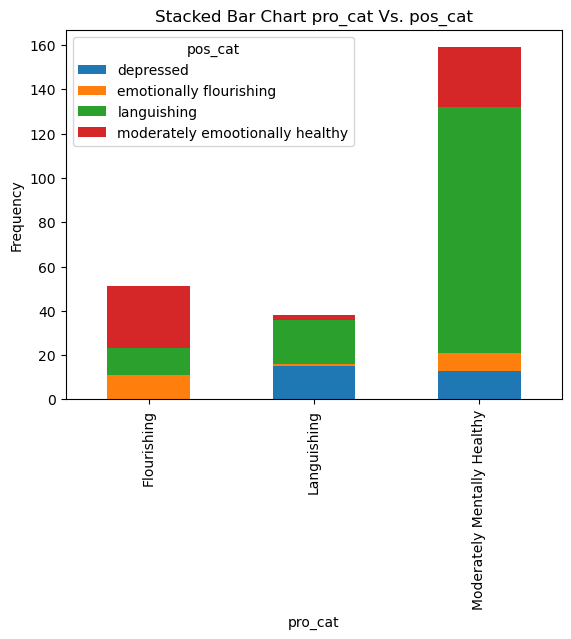

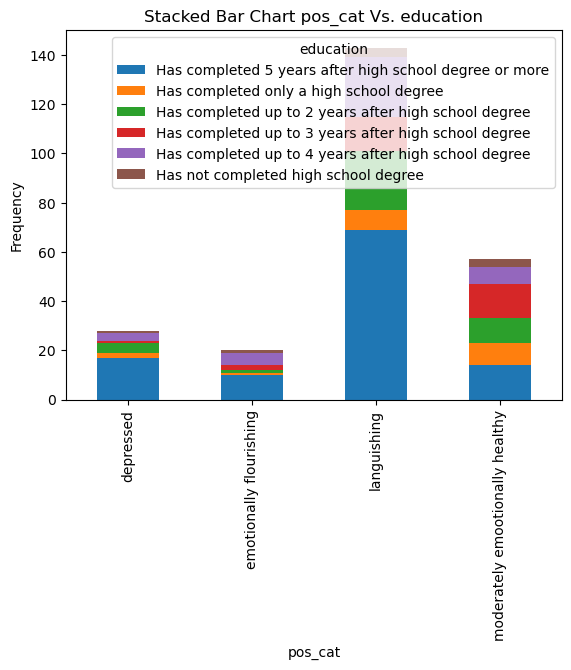

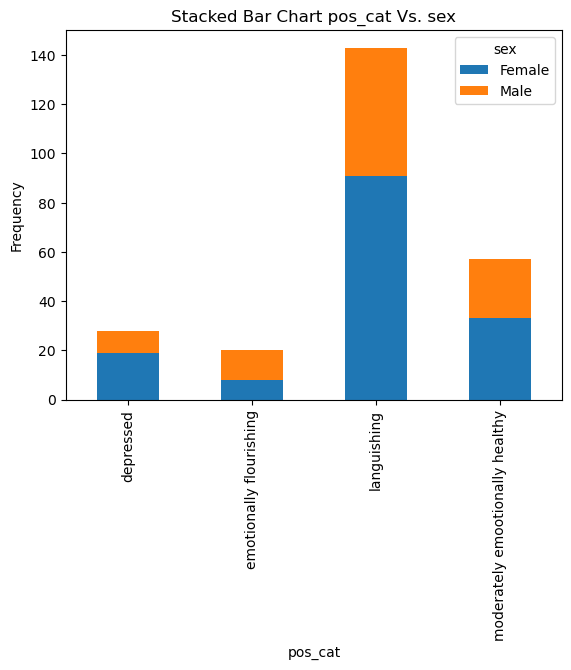

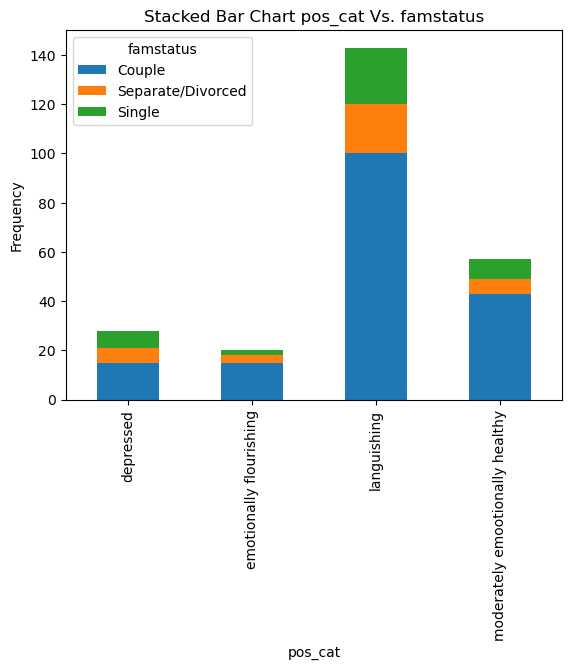

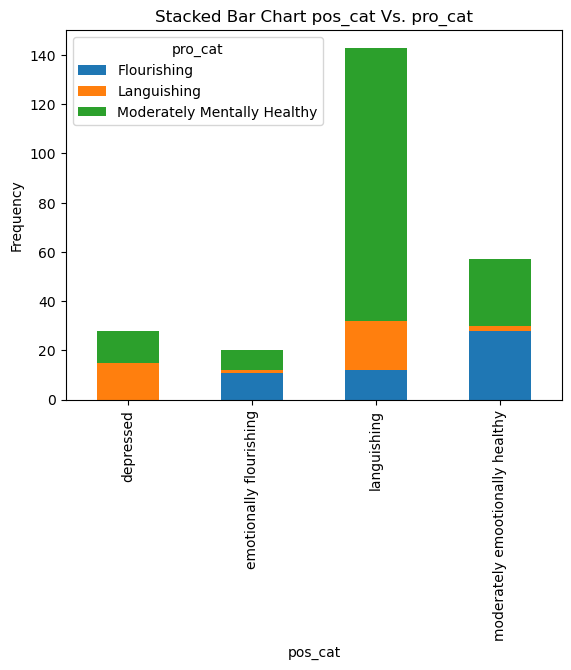

In [85]:
stacker_bar (df,categorical)



## Quantitative Vs. Quantitative


In [87]:
quantitative = ["age","pro_quant","priv_quant","flow"]

In [88]:
# Use the .corr function to obtain the correlation table
correlation = df[quantitative].corr()
correlation

,age,pro_quant,priv_quant,flow
age,1.000000,0.229625,0.151607,0.367994
pro_quant,0.229625,1.000000,0.635679,0.536229
priv_quant,0.151607,0.635679,1.000000,0.409439
flow,0.367994,0.536229,0.409439,1.000000


In [89]:
#Test the correlation with Pearson R from scipy
from scipy.stats import pearsonr
def correlation_pearson (df,quantitative_variables):
  for i, var1 in enumerate(quantitative_variables):
    for j, var2 in enumerate(quantitative_variables):
      if i < j:
        r, p = pearsonr(df[var1], df[var2])
        print(f"Pearson Correlation Coefficient for {var1} Vs. {var2}: {r}")
        print(f"P-Value for {var1} Vs. {var2}: {p}")

In [90]:
correlation_pearson(df,quantitative)

Pearson Correlation Coefficient for age Vs. pro_quant: 0.22962490119377382
P-Value for age Vs. pro_quant: 0.0002656135100247766
Pearson Correlation Coefficient for age Vs. priv_quant: 0.15160657829757493
P-Value for age Vs. priv_quant: 0.016881986118607358
Pearson Correlation Coefficient for age Vs. flow: 0.36799398101848513
P-Value for age Vs. flow: 2.2735848758952843e-09
Pearson Correlation Coefficient for pro_quant Vs. priv_quant: 0.6356793105641754
P-Value for pro_quant Vs. priv_quant: 1.7686137882164033e-29
Pearson Correlation Coefficient for pro_quant Vs. flow: 0.5362292444060371
P-Value for pro_quant Vs. flow: 7.275264895390285e-20
Pearson Correlation Coefficient for priv_quant Vs. flow: 0.4094387267188061
P-Value for priv_quant Vs. flow: 1.9222714486707287e-11


In [91]:
def scatter (df, quantitative_variables):
  for var1 in quantitative_variables:
    for var2 in quantitative_variables:
      if var1 != var2:
        plt.figure()
        sb.scatterplot(data=df,x=var1, y=var2)
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.title(f"Scatter Plot of {var1} Vs. {var2}")
        plt.show()
        print("\n")

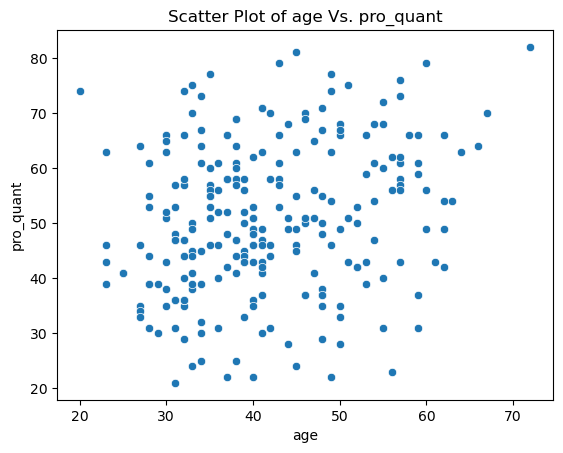

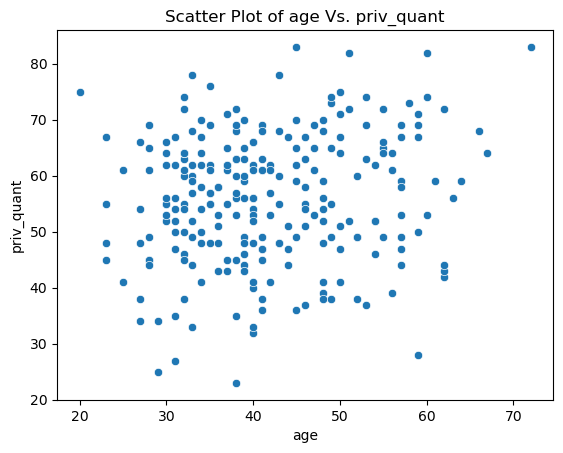

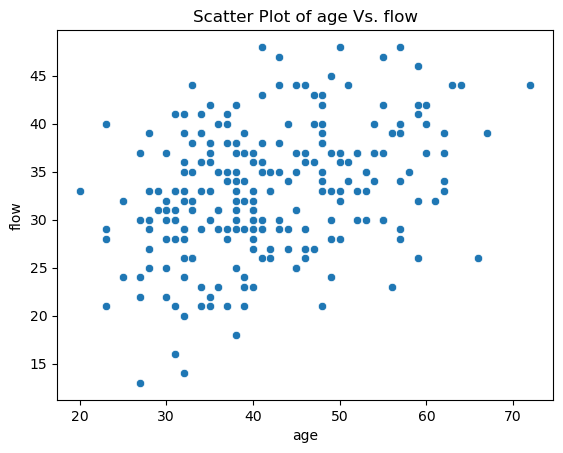

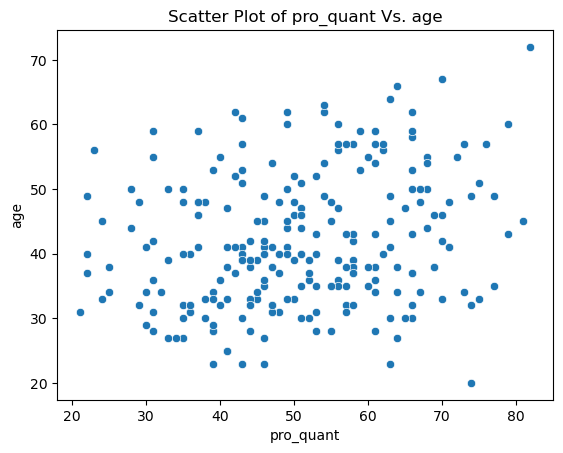

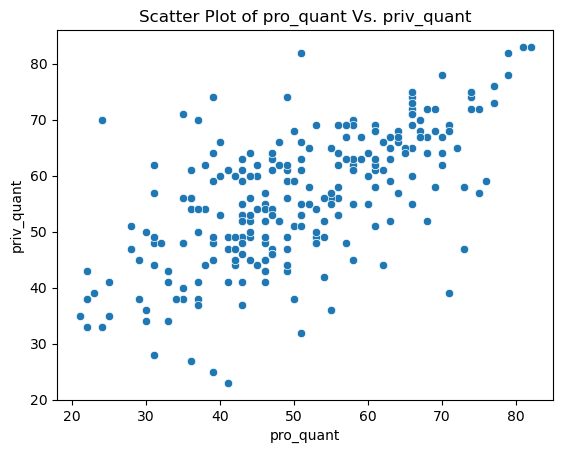

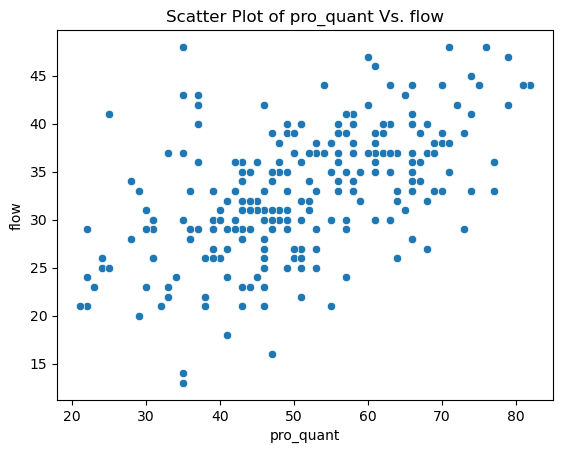

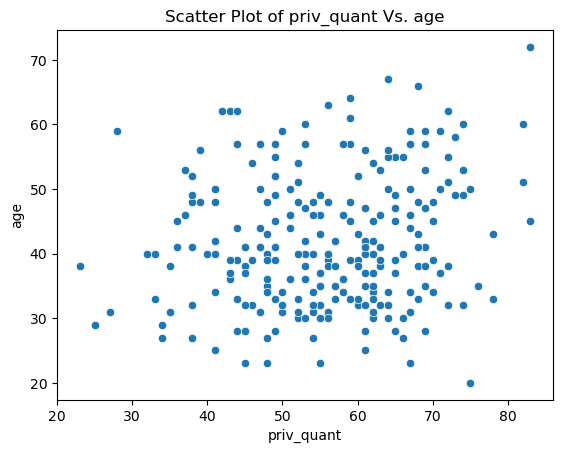

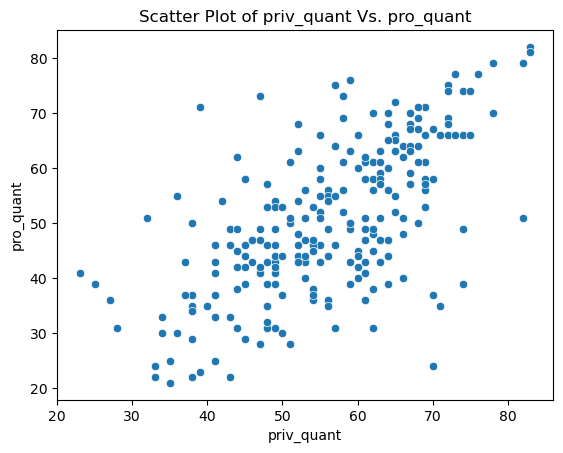

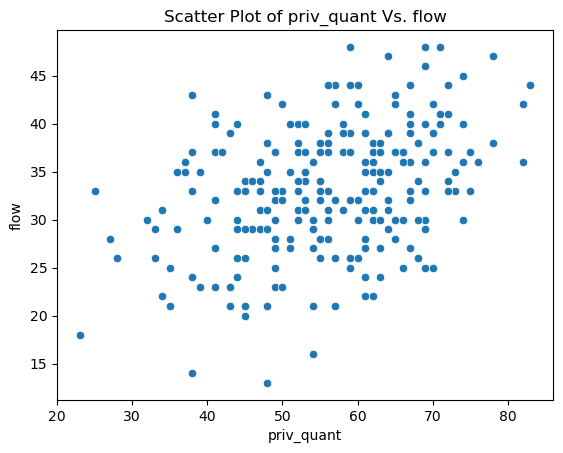

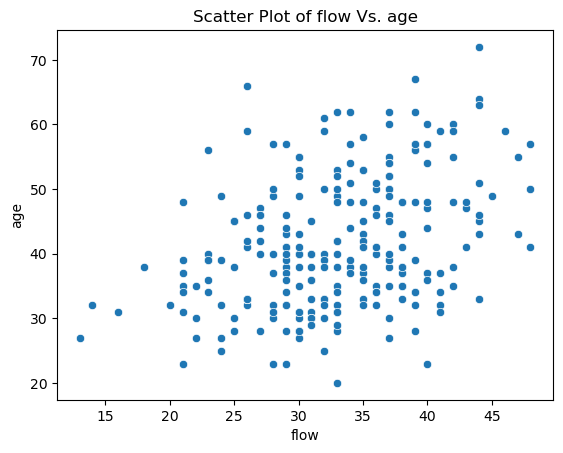

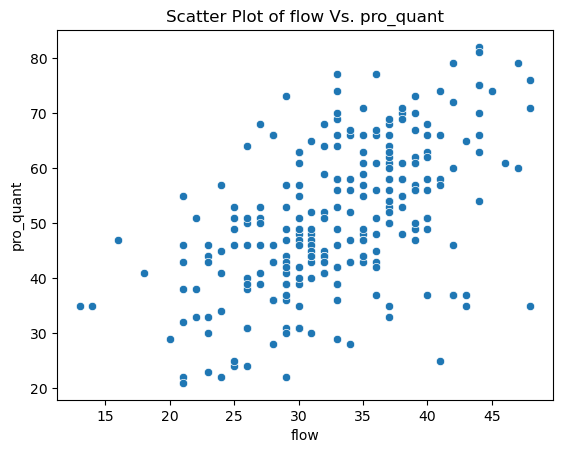

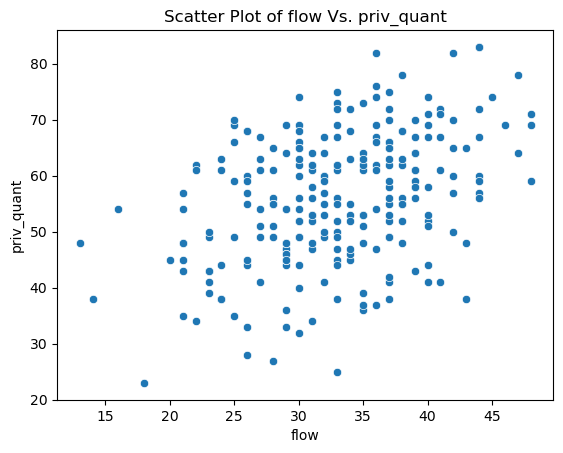

In [92]:
scatter (df,quantitative)



## Quantitative Vs. Categorical





In [94]:
# Create an anova function that can calculate the f and p value
from scipy import stats

def anova (df,quantitative_variables,categorical_variables):
  for cat_column in categorical_variables:
    for quant_column in quantitative_variables:
      results = [df[df[cat_column]== category][quant_column]for category in df [cat_column].unique()]
      f_value, p_value = stats.f_oneway(*results)
      print(f"ANOVA for {cat_column} Vs. {quant_column}:")
      print(f"F-value: {f_value}")
      print(f"P-value: {p_value}")
      print("\n")

In [95]:
anova (df,quantitative,categorical)

ANOVA for education Vs. age:
F-value: 1.9000092078817206
P-value: 0.09498308797275642


ANOVA for education Vs. pro_quant:
F-value: 2.4707944193736817
P-value: 0.03313846584639675


ANOVA for education Vs. priv_quant:
F-value: 1.3979433172984113
P-value: 0.2256571310448555


ANOVA for education Vs. flow:
F-value: 3.74889198574879
P-value: 0.002746687665181348


ANOVA for sex Vs. age:
F-value: 0.40149335527752095
P-value: 0.5269077121187967


ANOVA for sex Vs. pro_quant:
F-value: 0.8563289565133827
P-value: 0.3556749365770713


ANOVA for sex Vs. priv_quant:
F-value: 0.015610689413731636
P-value: 0.9006709179497444


ANOVA for sex Vs. flow:
F-value: 0.4836053338827953
P-value: 0.4874501604405136


ANOVA for famstatus Vs. age:
F-value: 15.963232540676795
P-value: 3.0422768747014055e-07


ANOVA for famstatus Vs. pro_quant:
F-value: 0.2928963357236913
P-value: 0.7463603618049064


ANOVA for famstatus Vs. priv_quant:
F-value: 3.873111519819784
P-value: 0.022078660765379055


ANOVA for famsta

In [96]:
def grouped_box_plots (df,quantitative_variables,categorical_variables):
  for cat_column in categorical_variables:
    for quant_column in quantitative_variables:
      sb.boxplot(x=cat_column, y=quant_column, data=df)
      plt.xlabel(cat_column)
      plt.ylabel(quant_column)
      plt.title(f"Box Plot of {quant_column} by {cat_column}")
      plt.show()
      plt.xticks(rotation=90)
      print("\n")

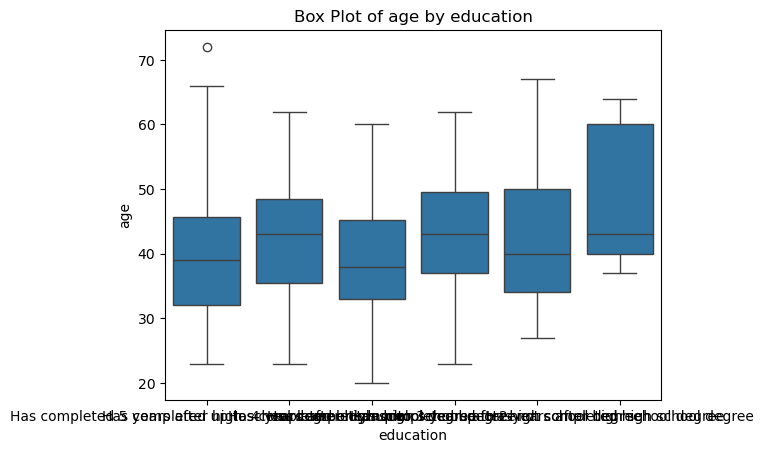

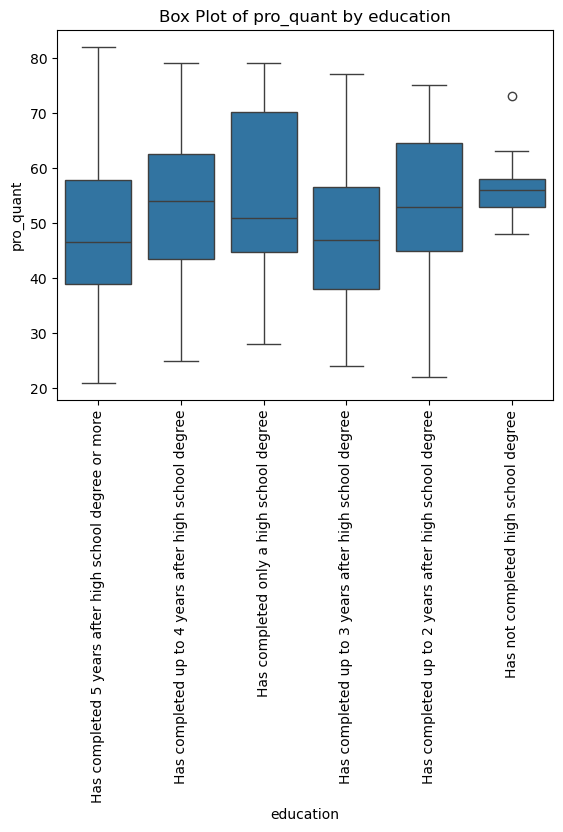

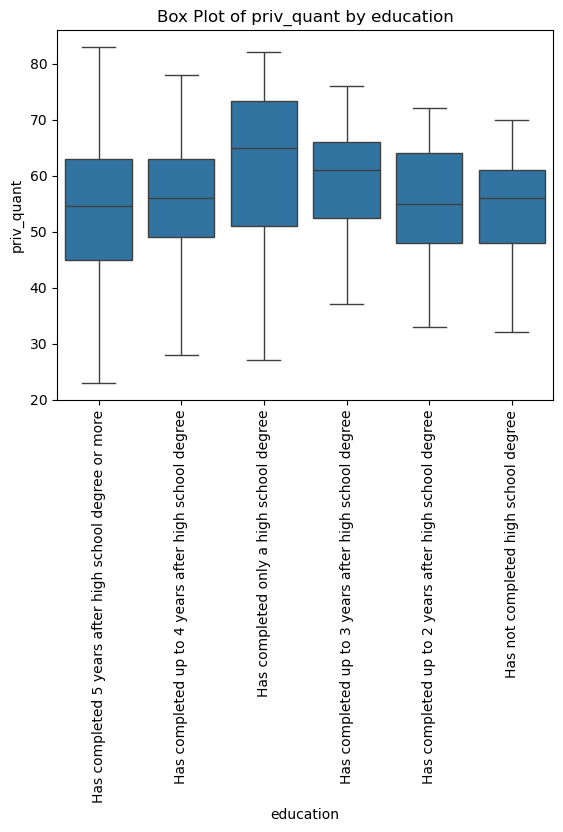

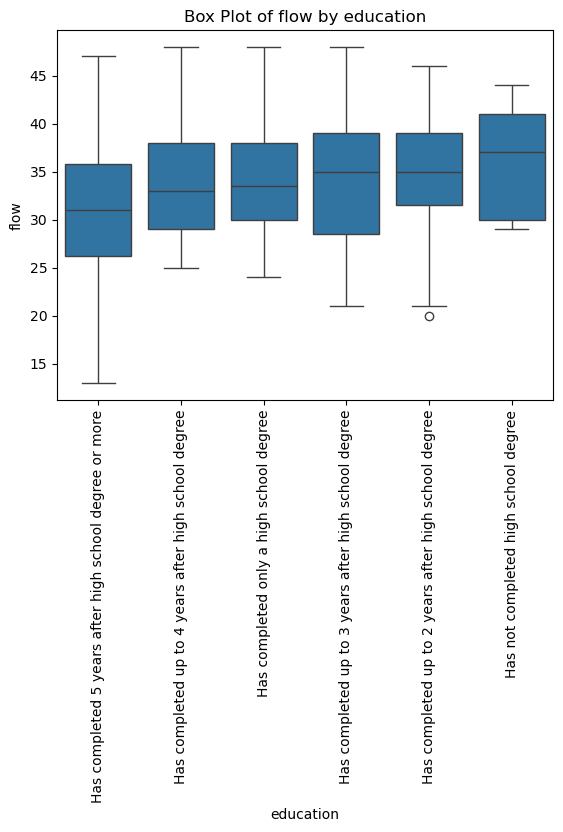

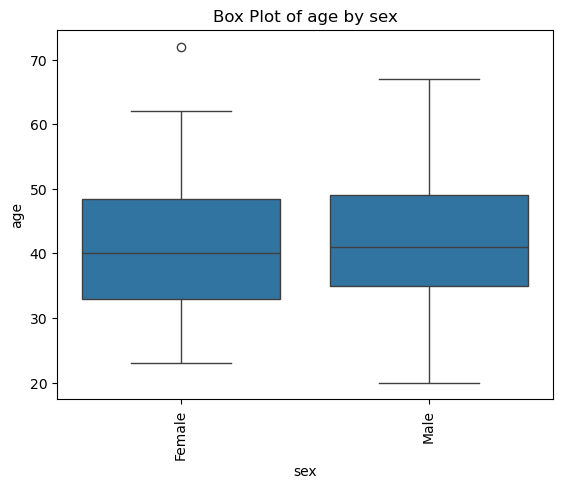

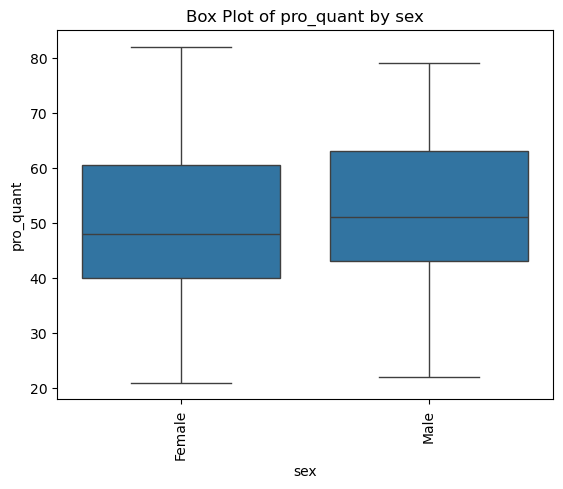

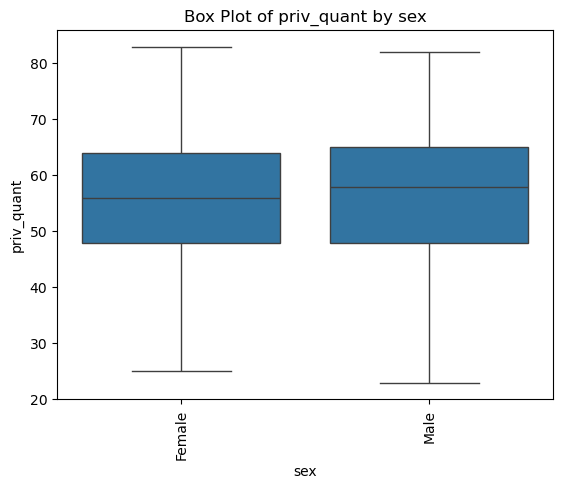

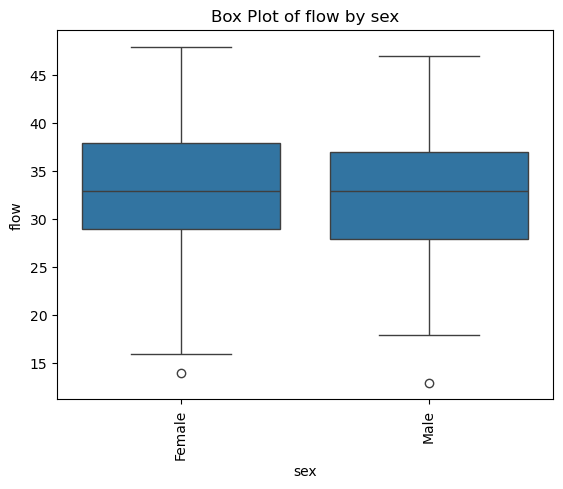

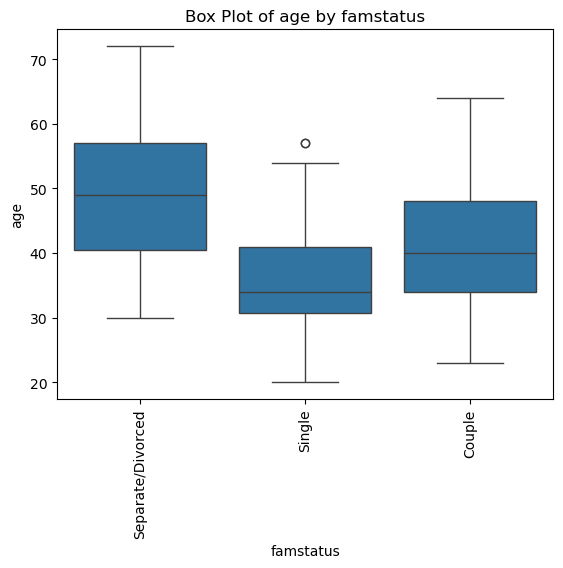

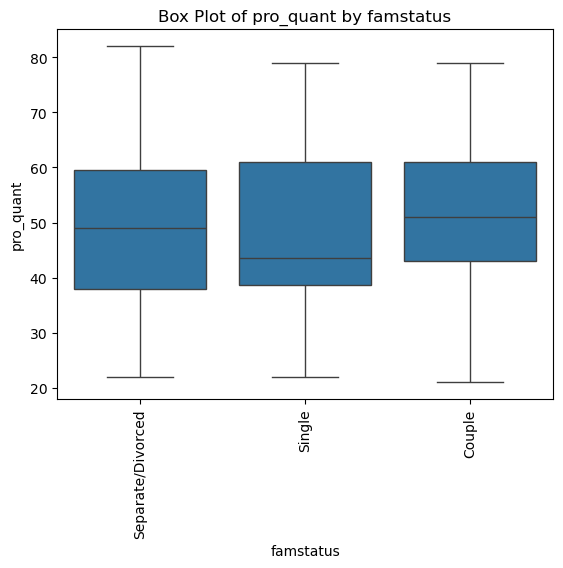

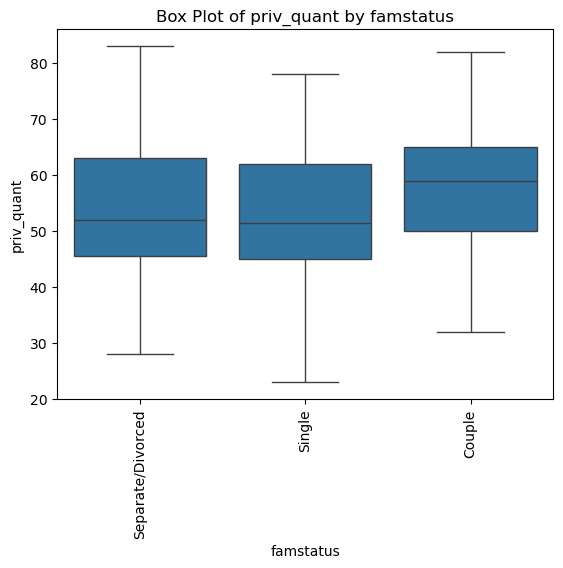

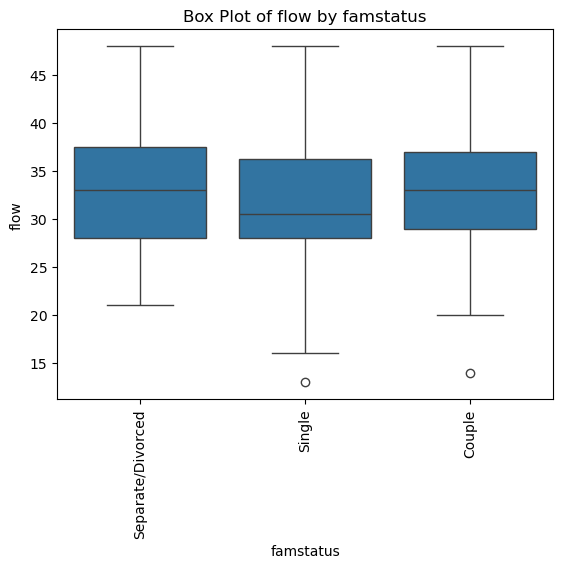

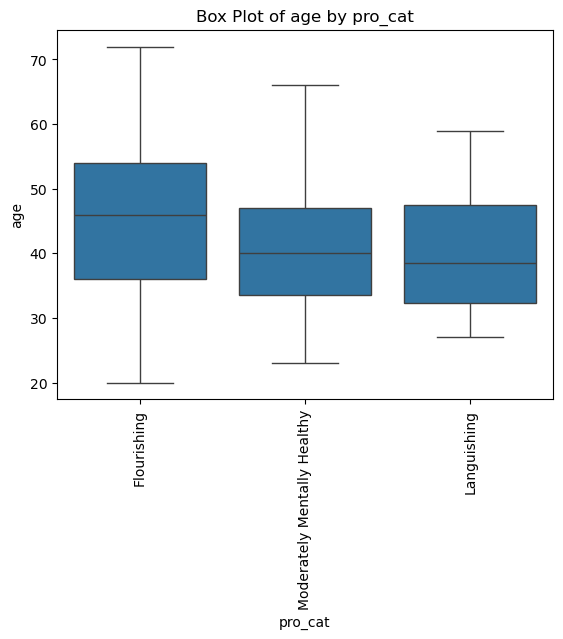

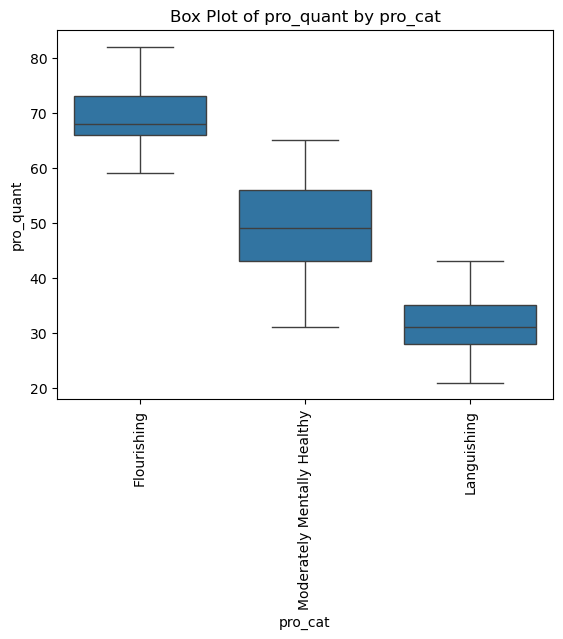

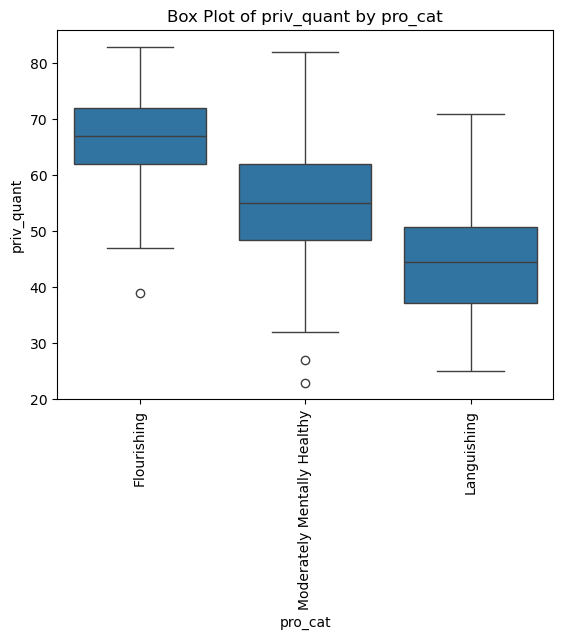

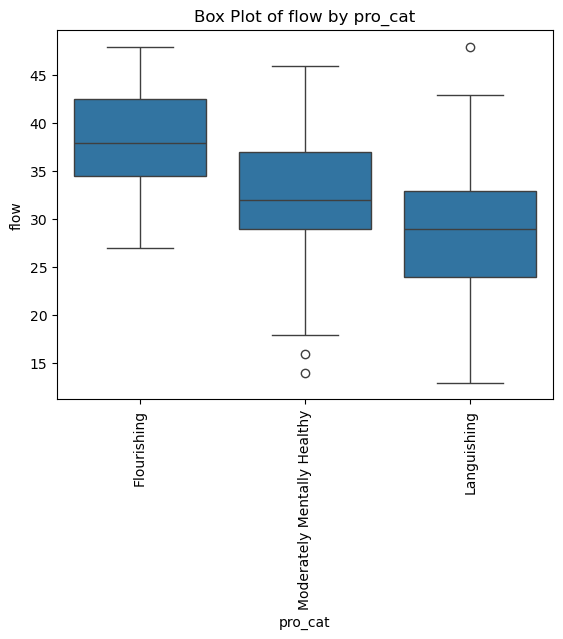

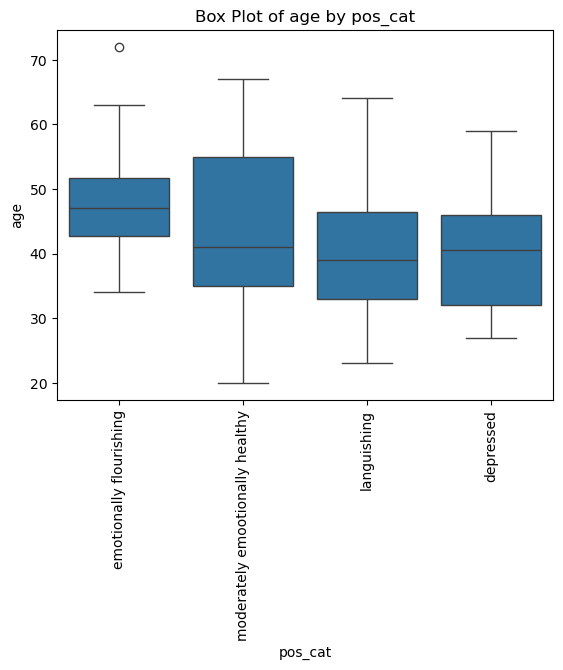

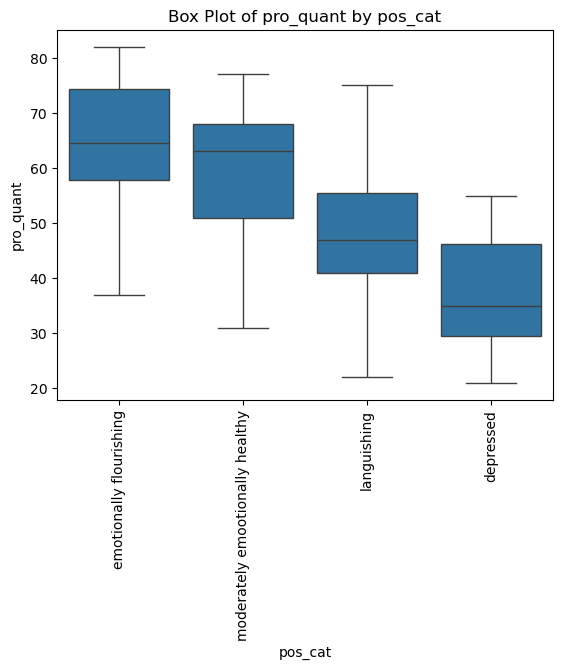

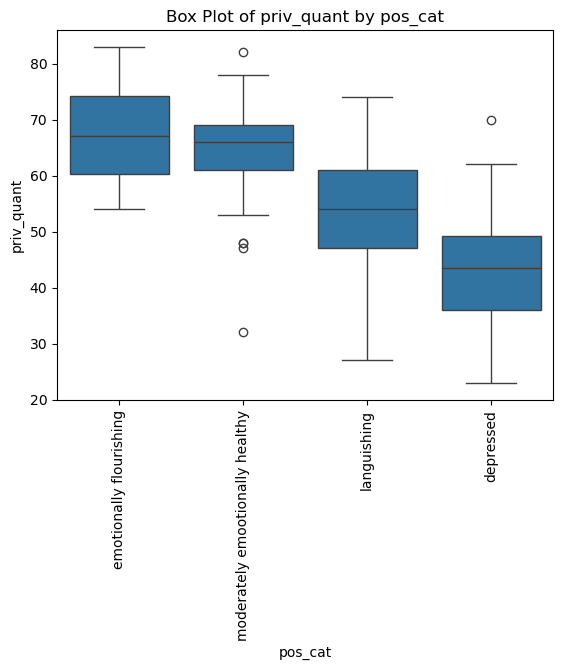

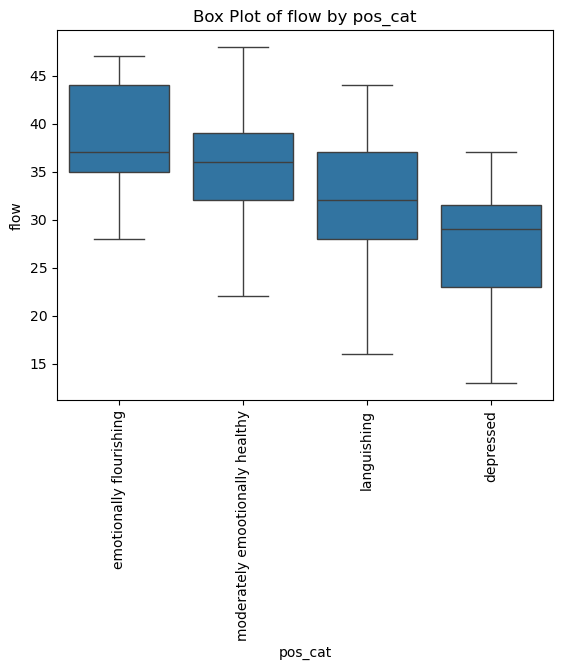

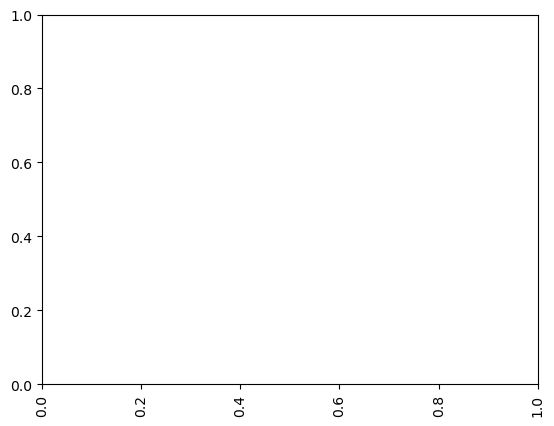

In [97]:
grouped_box_plots (df,quantitative,categorical)

## MODELING

## LINEAR REGRESSION


## Simple Linear Regression



In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [102]:
X_simple = df[["positivity"]]
Y_simple = df["flow"]

In [103]:
linreg = LinearRegression()
linreg.fit(X_simple, Y_simple)

LinearRegression()

In [104]:
y_pred_simple = linreg.predict(X_simple)

In [105]:
RMSE_simple = np.sqrt(mean_squared_error(Y_simple, y_pred_simple))
R_square_simple = r2_score(Y_simple, y_pred_simple)

In [106]:
print(f'Simple Linear Regression to predict Flow using Positivity as predictor:')
print(f'Root Mean Squared Error (RMSE): {RMSE_simple:.3f}')
print(f'R²: {R_square_simple:.3f}')
print(f'Intercept: {linreg.intercept_:.3f}')
print(f'Coefficient for positivity: {linreg.coef_[0]:.3f}')

Simple Linear Regression to predict Flow using Positivity as predictor:
Root Mean Squared Error (RMSE): 5.915
R²: 0.193
Intercept: 26.403
Coefficient for positivity: 3.612


In [107]:
X_simple_pro = df[['pro_quant']]
y_simple_pro = df['flow']

linreg.fit(X_simple_pro, y_simple_pro)

y_pred_simple_pro = linreg.predict(X_simple_pro)

RMSE_simple_prof = np.sqrt(mean_squared_error(y_simple_pro, y_pred_simple_pro))
R_square_simple_prof = r2_score(y_simple_pro, y_pred_simple_pro)

print(f'Simple Linear Regression using prof_quant:')
print(f'Root Mean Squared Error (RMSE): {RMSE_simple_prof:.3f}')
print(f'R²: {R_square_simple_prof:.3f}')
print(f'Intercept: {linreg.intercept_:.3f}')
print(f'Coefficient for prof_quant: {linreg.coef_[0]:.3f}')


Simple Linear Regression using prof_quant:
Root Mean Squared Error (RMSE): 5.559
R²: 0.288
Intercept: 19.617
Coefficient for prof_quant: 0.263


In [108]:
X_simple_age = df[['age']]
y_simple_age = df['flow']

linreg_age = LinearRegression()

linreg_age.fit(X_simple_age, y_simple_age)

y_pred_simple_age = linreg_age.predict(X_simple_age)

RMSE_simple_age = np.sqrt(mean_squared_error(y_simple_age, y_pred_simple_age))
R_square_simple_age = r2_score(y_simple_age, y_pred_simple_age)

print(f'Simple Linear Regression using age:')
print(f'Root Mean Squared Error (RMSE): {RMSE_simple_age:.3f}')
print(f'R²: {R_square_simple_age:.3f}')
print(f'Intercept: {linreg_age.intercept_:.3f}')
print(f'Coefficient for age: {linreg_age.coef_[0]:.3f}')

Simple Linear Regression using age:
Root Mean Squared Error (RMSE): 6.124
R²: 0.135
Intercept: 22.982
Coefficient for age: 0.239


## Multiple Linear Regression



In [110]:

y = df['flow']

quantitative_predictors = ['pro_quant', 'positivity', 'age', 'priv_quant']

categorical_predictors = ['sex', 'famstatus', 'education', 'pro_cat', 'pos_cat']

X_categorical = pd.get_dummies(df[categorical_predictors], drop_first=True)

X_quantitative = df[quantitative_predictors]
X = pd.concat([X_quantitative, X_categorical], axis=1)

linreg = LinearRegression()

linreg.fit(X, y)

y_pred = linreg.predict(X)

RMSE = np.sqrt(mean_squared_error(y, y_pred))
R_square = r2_score(y, y_pred)

n = X.shape[0]
p = X.shape[1]
R_square_adj = 1 - (1 - R_square) * (n - 1) / (n - p - 1)

print(f'Multiple Linear Regression Results:')
print(f'Root Mean Squared Error (RMSE): {RMSE:.3f}')
print(f'R²: {R_square:.3f}')
print(f'Adjusted R²: {R_square_adj:.3f}')
print(f'Intercept: {linreg.intercept_:.3f}')
print(f'Coefficients:')
for name, coef in zip(X.columns, linreg.coef_):
    print(f'{name}: {coef:.3f}')


Multiple Linear Regression Results:
Root Mean Squared Error (RMSE): 5.003
R²: 0.423
Adjusted R²: 0.380
Intercept: 9.514
Coefficients:
pro_quant: 0.224
positivity: -0.078
age: 0.167
priv_quant: 0.027
sex_Male: -1.512
famstatus_Separate/Divorced: -1.843
famstatus_Single: -0.625
education_Has completed only a high school degree: 2.037
education_Has completed up to 2 years after high school degree: 2.726
education_Has completed up to 3 years after high school degree: 1.833
education_Has completed up to 4 years after high school degree: 1.822
education_Has not completed high school degree: 1.600
pro_cat_Languishing: 3.160
pro_cat_Moderately Mentally Healthy: 0.623
pos_cat_emotionally flourishing: 4.641
pos_cat_languishing: 2.669
pos_cat_moderately emootionally healthy: 3.281


In [111]:
y = df['flow']

quantitative_predictors_2 = ['pro_quant', 'age']

categorical_predictors_2 = ['sex', 'famstatus', 'education', 'pro_cat', 'pos_cat']

X_categorical = pd.get_dummies(df[categorical_predictors_2], drop_first=True)

X_quantitative = df[quantitative_predictors_2]
X = pd.concat([X_quantitative, X_categorical], axis=1)

linreg = LinearRegression()

linreg.fit(X, y)

y_pred = linreg.predict(X)

RMSE = np.sqrt(mean_squared_error(y, y_pred))
R_square = r2_score(y, y_pred)

n = X.shape[0]
p = X.shape[1]
R_square_adj = 1 - (1 - R_square) * (n - 1) / (n - p - 1)

print(f'Multiple Linear Regression Results:')
print(f'Root Mean Squared Error (RMSE): {RMSE:.3f}')
print(f'R²: {R_square:.3f}')
print(f'Adjusted R²: {R_square_adj:.3f}')
print(f'Intercept: {linreg.intercept_:.3f}')
print(f'Coefficients:')
for name, coef in zip(X.columns, linreg.coef_):
    print(f'{name}: {coef:.3f}')

Multiple Linear Regression Results:
Root Mean Squared Error (RMSE): 5.008
R²: 0.422
Adjusted R²: 0.384
Intercept: 10.325
Coefficients:
pro_quant: 0.234
age: 0.167
sex_Male: -1.549
famstatus_Separate/Divorced: -1.901
famstatus_Single: -0.732
education_Has completed only a high school degree: 2.115
education_Has completed up to 2 years after high school degree: 2.672
education_Has completed up to 3 years after high school degree: 1.871
education_Has completed up to 4 years after high school degree: 1.771
education_Has not completed high school degree: 1.451
pro_cat_Languishing: 3.156
pro_cat_Moderately Mentally Healthy: 0.625
pos_cat_emotionally flourishing: 4.795
pos_cat_languishing: 2.762
pos_cat_moderately emootionally healthy: 3.463


## LOGISTIC REGRESSION


Accuracy: 0.740
Sensitivity (Recall): 0.760
Specificity: 0.720
Precision: 0.731
F1-Score: 0.745


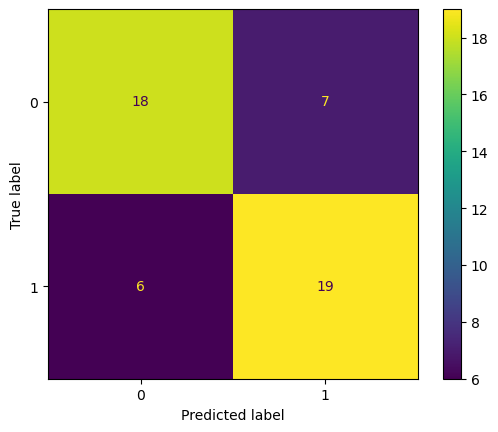

In [113]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
df['positivity_binary'] = (df['positivity'] > df['positivity'].median()).astype(int)

y = df['positivity_binary']
quantitative_predictors = ['pro_quant', 'age', 'priv_quant']
categorical_predictors = ['sex', 'famstatus', 'education', 'pro_cat']

X_categorical = pd.get_dummies(df[categorical_predictors], drop_first=True)
X_quantitative = df[quantitative_predictors]
X = pd.concat([X_quantitative, X_categorical], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.3f}')

conf_matrix = confusion_matrix(y_valid, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=logreg.classes_).plot()

tn, fp, fn, tp = conf_matrix.ravel()

sensitivity = tp / (tp + fn)
print(f'Sensitivity (Recall): {sensitivity:.3f}')

specificity = tn / (tn + fp)
print(f'Specificity: {specificity:.3f}')

precision = tp / (tp + fp)
print(f'Precision: {precision:.3f}')

f1_lr = f1_score(y_valid, y_pred)
print(f'F1-Score: {f1_lr:.3f}')

In [114]:
df.head()

,age,education,sex,famstatus,pro_cat,pro_quant,priv_cat,priv_quant,positivity,flow,pos_cat,positivity_binary
ID,,,,,,,,,,,,
344,72,Has completed 5 years after high school degree...,Female,Separate/Divorced,Flourishing,82,Flourishing,83,4.142857,44,emotionally flourishing,1
317,45,Has completed 5 years after high school degree...,Female,Separate/Divorced,Flourishing,81,Flourishing,83,4.000000,44,emotionally flourishing,1
444,43,Has completed up to 4 years after high school ...,Male,Single,Flourishing,79,Flourishing,78,5.000000,47,emotionally flourishing,1
270,60,Has completed only a high school degree,Female,Couple,Flourishing,79,Flourishing,82,4.666667,42,emotionally flourishing,1
52,49,Has completed only a high school degree,Female,Separate/Divorced,Flourishing,77,Flourishing,73,2.285714,33,moderately emootionally healthy,1
